In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import warnings
warnings.filterwarnings("ignore")

In [2]:
file_path = "/Users/winirrr/Documents/EventBased_Project/Iris.csv"
df = pd.read_csv(file_path)
df = df.iloc[:,1:]

In [3]:
df.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df_ = df.drop(columns=['Species']).copy()

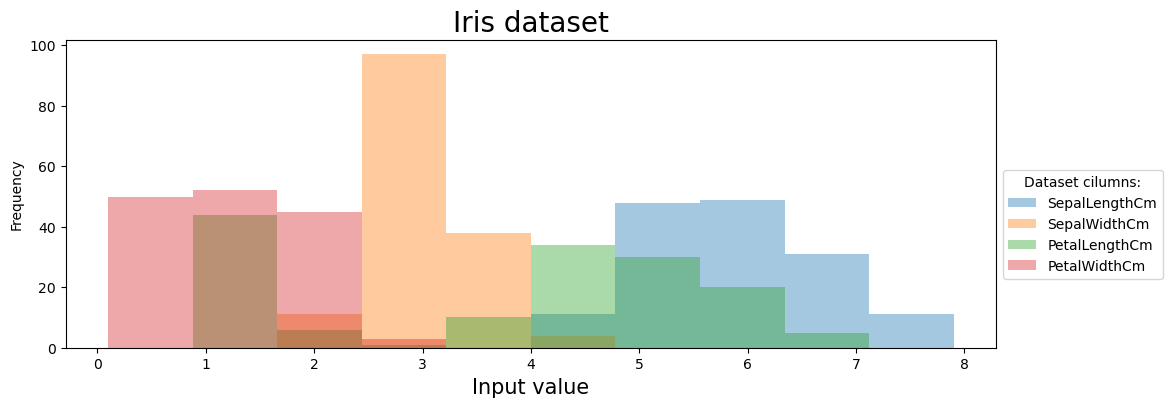

In [5]:
df_.plot.hist(alpha = 0.4, figsize = (12, 4))
plt.legend(title = "Dataset cilumns:" ,bbox_to_anchor = (1.0, 0.6),
                                                   loc = 'upper left')
plt.title('Iris dataset', fontsize = 20)
plt.xlabel('Input value', fontsize = 15)
plt.show()

In [6]:
def Gaus_neuron(df, n, step, s):

    neurons_list = list()
    x_axis_list = list()
    t = 0

    for col in df.columns:

        vol = df[col].values
        min_ = np.min(vol)
        max_ = np.max(vol)
        x_axis = np.arange(min_, max_, step)
        x_axis[0] = min_
        x_axis[-1] = max_
        x_axis_list.append(np.round(x_axis, 10))
        neurons = np.zeros((n, len(x_axis)))

        for i in range(n):

            loc = (max_ - min_) * (i /(n-1)) + min_
            neurons[i] = norm.pdf(x_axis, loc, s[t])
            neurons[i] = neurons[i] / np.max(neurons[i])

        neurons_list.append(neurons)
        t += 1

    return neurons_list, x_axis_list

In [7]:
sigm = [0.1, 0.1, 0.2, 0.1]
d = Gaus_neuron(df_, 10, 0.001, sigm)

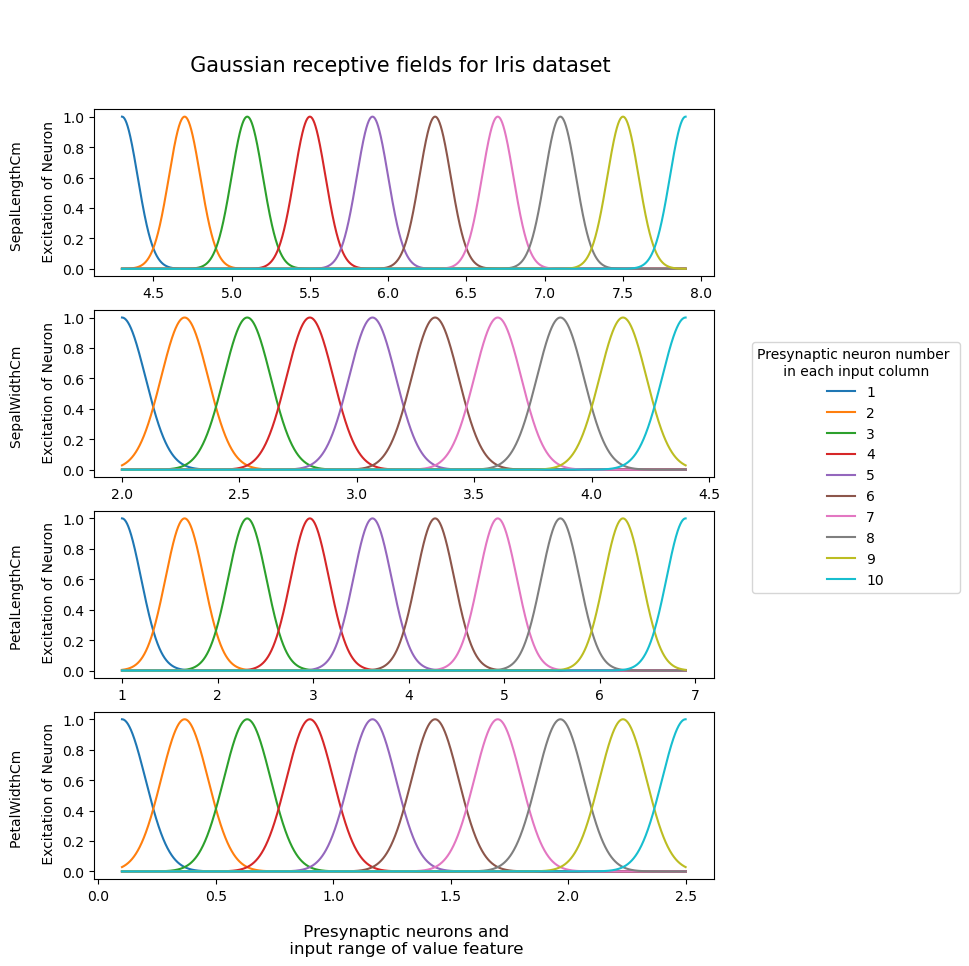

In [8]:
fig, axes = plt.subplots(4, figsize=(8, 10))

k = 0

for ax in axes:

    ax.set(ylabel = f'{df_.columns[k]} \n\n Excitation of Neuron')

    for i in range(len(d[0][k])):

        ax.plot(d[1][k], d[0][k][i], label = i + 1)

    k+=1

plt.legend(title = "Presynaptic neuron number \n      in each input column" ,
                            bbox_to_anchor = (1.05, 3.25), loc = 'upper left')
plt.suptitle(' \n\n  Gaussian receptive fields for Iris dataset',
                                                                 fontsize = 15)
ax.set_xlabel(' Presynaptic neurons and\n input range of value feature', 
                                                  fontsize = 12, labelpad = 15)

plt.show()


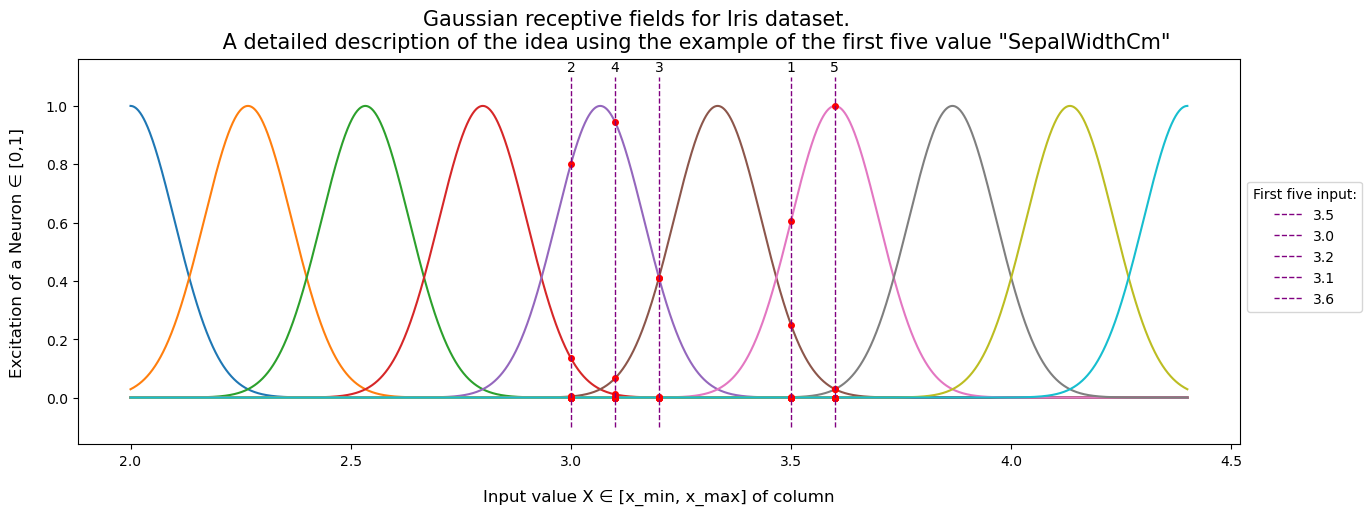

In [9]:
x_input = 5
fig, ax = plt.subplots(1)

fig.set_figheight(5)
fig.set_figwidth(15)

ax.set(ylabel = df_.columns[1])

for i in range(len(d[0][1])):
    ax.plot(d[1][1], d[0][1][i])

for n in range(x_input):

    plt.plot(np.tile(df_['SepalWidthCm'][n], (10,1)), 
         d[0][1][np.tile(d[1][1] == df_['SepalWidthCm'][n], (10,1))], 
                                                            'ro', markersize=4)

    plt.vlines(x = df_['SepalWidthCm'][n], ymin = - 0.1, ymax = 1.1, 
               colors = 'purple', ls = '--', lw = 1, label = df_['SepalWidthCm'][n])

    plt.text(df_['SepalWidthCm'][n] * 0.997, 1.12, n + 1, size = 10)


plt.legend(title = "First five input:", bbox_to_anchor = (1.0, 0.7), 
                                                            loc = 'upper left')

plt.suptitle('Gaussian receptive fields for Iris dataset. \n \
                A detailed description of the idea using the example of the first five value "SepalWidthCm"',
            fontsize = 15)

ax.set_xlabel('Input value X ∈ [x_min, x_max] of column', fontsize = 12, labelpad = 15)
ax.set_ylabel('Excitation of a Neuron ∈ [0,1]', fontsize = 12, labelpad = 15)

plt.show()


In [10]:
np.set_printoptions(formatter={'float_kind':'{:f}'.format})
five_x = np.zeros((5, 10))

for n in range(x_input):
    five_x[n,:] = d[0][1][np.tile(d[1][1] == df_['SepalWidthCm'][n], (10,1))]

five_x

array([[0.000000, 0.000000, 0.000000, 0.000000, 0.000084, 0.249354,
        0.606531, 0.001204, 0.000000, 0.000000],
       [0.000000, 0.000000, 0.000019, 0.135335, 0.800742, 0.003866,
        0.000000, 0.000000, 0.000000, 0.000000],
       [0.000000, 0.000000, 0.000000, 0.000335, 0.411115, 0.411115,
        0.000335, 0.000000, 0.000000, 0.000000],
       [0.000000, 0.000000, 0.000000, 0.011109, 0.945965, 0.065729,
        0.000004, 0.000000, 0.000000, 0.000000],
       [0.000000, 0.000000, 0.000000, 0.000000, 0.000001, 0.028566,
        1.000000, 0.028566, 0.000001, 0.000000]])

In [11]:
five_x = np.where(five_x > 0.1, 1 - five_x, np.nan)
five_x[five_x == 0] = 0.0001
five_x

array([[nan, nan, nan, nan, nan, 0.750646, 0.393469, nan, nan, nan],
       [nan, nan, nan, 0.864665, 0.199258, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, 0.588885, 0.588885, nan, nan, nan, nan],
       [nan, nan, nan, nan, 0.054035, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, 0.000100, nan, nan, nan]])

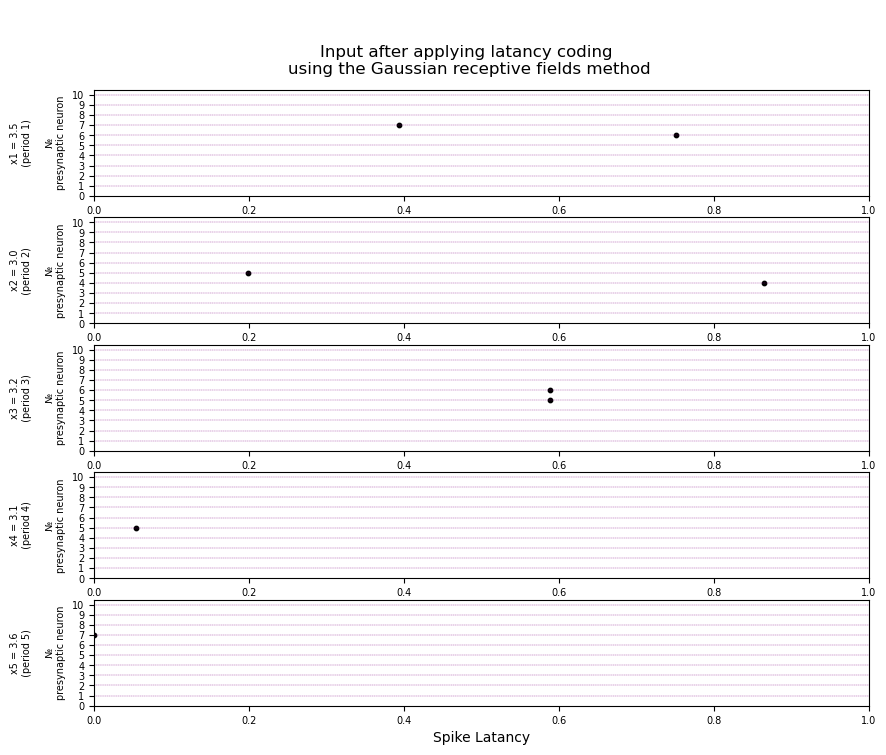

In [12]:
fig, ax = plt.subplots(5, figsize=(10, 8))

for i in range(5):
    ax[i].scatter(x = five_x[i], y = np.arange(1, 10 + 1), s = 10, color = 'black')
    ax[i].hlines(xmin = 0, xmax=1, y=np.arange(1, 11, 1),
               colors = 'purple', ls = '--', lw = 0.25)
    ax[i].yaxis.set_ticks(np.arange(0, 11, 1))
    ax[i].set_ylabel(f'x{i+1} = {df_.iloc[i,1]}\n (period {i+1}) \n\n № \npresynaptic neuron',
                                                                  fontsize = 7)
    ax[i].set_xlim(0, 1)
    ax[i].set_ylim(0, 10 * 1.05)
    ax[i].tick_params(labelsize = 7)

ax[i].set_xlabel('Spike Latancy')
plt.suptitle(' \n\nInput after applying latancy coding \nusing the Gaussian receptive fields method', 
                                                                 fontsize = 12)
plt.show()

In [13]:
def Lat_Spike(df, d, n):

    for i in range(len(df.columns)):

        k = len(df.iloc[:, i])
        st1 = np.tile(d[1][i], (k, 1))
        st2 = df.iloc[:, i].values.reshape(-1, 1)
        ind = (st1 == st2)
        exc = np.tile(d[0][i], (k, 1)).reshape(k, n, len(d[0][i][0]))[
            np.repeat(ind, n, axis=0).reshape(k, n, len(ind[0]))].reshape(k, n)
        lat_neuron = np.transpose(np.where(exc > 0.1, 1 - exc, np.nan))

        if i == 0:
            lat_neuron_total = lat_neuron
        else:
            lat_neuron_total = np.concatenate((lat_neuron_total, lat_neuron), axis = 0)

    lat_neuron_total[lat_neuron_total == 0] = 0.0001

    return lat_neuron_total

fin = Lat_Spike(df_, d, 10)

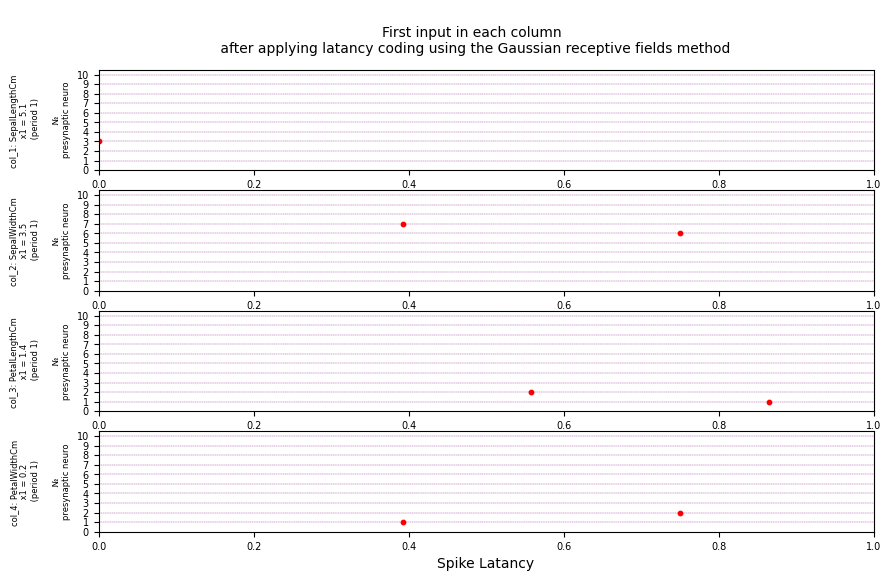

In [14]:
fig, ax = plt.subplots(4, figsize=(10, 6))

for i in range(4):

    ax[i].scatter(x = fin[i * 10:10 * (1 + i), 0], y = np.arange(1, 10 + 1), s = 10, color = 'r')
    ax[i].hlines(xmin = 0, xmax = 1, y=np.arange(1, 11, 1), 
               colors = 'purple', ls = '--', lw = 0.25)
    ax[i].yaxis.set_ticks(np.arange(0, 11, 1))
    ax[i].set_ylabel(f'col_{i + 1}: {(df_.columns)[i]} \n x1 = {df_.iloc[0, i]} \n (period {1})\n\n № \npresynaptic neuro', fontsize = 6)
    ax[i].set_xlim(0, 1)
    ax[i].set_ylim(0, 10 * 1.05)
    ax[i].tick_params(labelsize = 7)

ax[i].set_xlabel('Spike Latancy')
plt.suptitle('\nFirst input in each column \n after applying latancy coding using the Gaussian receptive fields method', fontsize = 10)
plt.show()


In [15]:
Final_df = pd.DataFrame(fin)
Final_df

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.393469,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,0.864665,0.000100,0.393469,NaN,NaN,0.393469,NaN,NaN,0.864665,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.000100,0.864665,NaN,NaN,0.393469,NaN,NaN,0.393469,NaN,0.864665,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,0.393469,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.393469,NaN,NaN,NaN,NaN,NaN,NaN,0.000100
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000100,0.864665,0.393469,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000100,0.864665,NaN,0.393469,0.000100,0.000100,NaN,0.864665,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.864665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


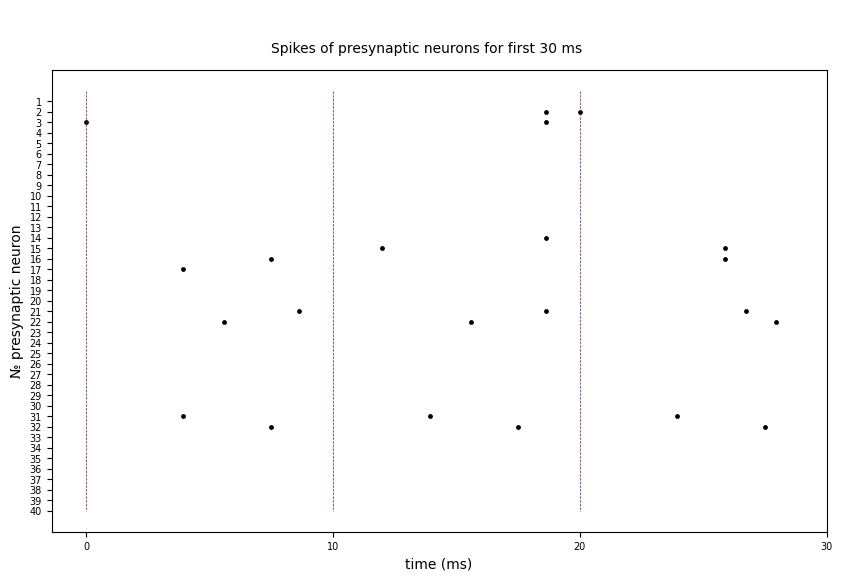

In [16]:
fig, ax = plt.subplots(1, figsize=(10, 6))
h = 3

for i in range(h):
    ax.scatter(x = (i+Final_df.iloc[:,i].values)*10, y = np.arange(1, 41), s = 6, color = 'black')

    plt.vlines(x = (i) * 10, ymin = 0, ymax = 40, 
               colors = 'purple', ls = '--', lw = 0.5)
    ax.tick_params(labelsize = 7)

ax.yaxis.set_ticks(np.arange(1, 41, 1))
ax.xaxis.set_ticks(np.arange(0, (h+1)*10, 10))
ax.set_xlabel('time (ms)')
ax.set_ylabel('№ presynaptic neuron')
plt.suptitle(' \n\nSpikes of presynaptic neurons for first 30 ms', fontsize = 10)
plt.gca().invert_yaxis()
plt.show()

In [17]:
def model_data(ind, ind_type, lat_ne, start, end):
    train_stack = np.vstack((lat_ne[ind_type[ind,0] + start:ind_type[ind, 0] + end],
                             lat_ne[ind_type[ind,1] + start:ind_type[ind, 1]+ end],
                             lat_ne[ind_type[ind,2] + start:ind_type[ind,2] + end]))
    train_stack = np.where(train_stack > 0, train_stack, 0)

    return train_stack

In [18]:
lat_ne = np.transpose(Final_df.values)
ind_type = np.array(([0, 50, 100], [50, 100, 0], [100, 0, 50]))
list_weight = np.zeros((3,40))

for ind in range(3):
    
    train_stack = model_data(ind, ind_type, lat_ne, 0, 20)
    tr_ar = np.where(np.transpose(train_stack) > 0, 2 * (1 - np.transpose(train_stack)), 0)
    tr_ar[:, 20:] = tr_ar[:, 20:] * (-1)
    tr_ar = pd.DataFrame(tr_ar)
    tr_ar[20] = tr_ar.iloc[:,:20].sum(axis = 1) + 0.1
    tst_ar = np.float64(np.transpose(np.array(tr_ar.iloc[:,20:])))
    
    for i in range(1, len(tst_ar)):
        
        tst_ar[0][((np.round(tst_ar[0], 4) > 0.1) & (tst_ar[i] == 0))] += - np.float64(
            np.sum(tst_ar[i][np.round(tst_ar[0], 4) > 0.1]) / len(tst_ar[0][((
                np.round(tst_ar[0], 4) > 0.1) & (tst_ar[i] == 0))]))
        tst_ar[0][np.round(tst_ar[0], 4) > 0.1] += tst_ar[i][np.round(tst_ar[0], 4) > 0.1]
        tst_ar[0][tst_ar[0] < 0.1] = 0.1
        
    list_weight[ind, :] = tst_ar[0]

list_weight

array([[6.327651, 9.871060, 8.845120, 0.100000, 0.100000, 0.100000,
        0.100000, 0.100000, 0.100000, 0.100000, 0.100000, 0.100000,
        0.100000, 0.100000, 0.100000, 2.928582, 7.467641, 9.633854,
        3.937019, 5.114590, 9.286149, 24.821730, 0.100000, 0.100000,
        0.100000, 0.100000, 0.100000, 0.100000, 0.100000, 0.100000,
        22.327485, 20.183585, 0.100000, 0.100000, 0.100000, 0.100000,
        0.100000, 0.100000, 0.100000, 0.100000],
       [0.100000, 0.100000, 0.100000, 7.079353, 3.988910, 4.650976,
        4.987558, 0.100000, 0.100000, 0.100000, 8.024717, 10.069888,
        0.100000, 3.975590, 0.100000, 0.100000, 0.100000, 0.100000,
        0.100000, 0.100000, 0.100000, 0.100000, 0.100000, 6.758999,
        12.650149, 17.925515, 0.100000, 0.100000, 0.100000, 0.100000,
        0.100000, 0.100000, 0.100000, 11.383210, 13.145523, 25.117006,
        0.100000, 0.100000, 0.100000, 0.100000],
       [0.100000, 0.100000, 0.100000, 0.100000, 1.051971, 5.704924,
        4

In [19]:
def LIF_SNN(n, l, data, weight, v_spike):
    
    V_min = 0
    V_spike = v_spike
    r = 5
    tau = 2.5
    dt = 0.01
    t_max = 10
    time_stamps = t_max / dt
    time_relax = 10
    v = np.zeros((n, l, int(time_stamps)))
    t_post = np.zeros((n, l))
    t_post_ = np.zeros((n, int(l / 3)))
    v[:, :, 0] = V_min
    
    for n in range(n):
        for u in range(l):
            
            t = 0
            f0 = (np.round(data[u][np.newaxis].T, 3) * 1000).astype(int)
            f1 = np.tile(np.arange(1000), (40, 1))
            f2 = np.where(((f1 == f0) & (f0 > 0)), 1, 0)
            f2 = f2 * weight[n][np.newaxis].T
            spike_list = np.sum(f2.copy(), axis = 0)

            for step in range(int(time_stamps) - 1):
                if v[n, u, step] > V_spike:
                    t_post[n, u] = step
                    v[n, u, step] = 0
                    t = time_relax / dt
                elif t > 0:
                    v[n, u, step] = 0
                    t = t - 1

                v[n, u, step + 1] = v[n, u, step] + dt / tau * (-v[n, u, step] + r * spike_list[step])
        t_post_[n, :] = t_post[n, n * int(l / 3):n * int(l / 3) + int(l / 3)]
    
    return v, t_post_, t_post

In [20]:
def spike_plot(spike_times, one_per, n, cur_type):
    
    fig, (ax1, ax2, ax3) = plt.subplots(3, figsize = (25, 10))#, dpi = 70)
    
    if one_per:
        k, t, a  = 1, n, 0
        cur = cur_type
    else:
        k, t, a = len(spike_times[0]), 0, 1
        cur = 1
        
    spike_times[spike_times == 0] = np.nan
    di = {0: 'blue', 1: 'red', 2: 'black'}
    di_t = {0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}
    p = 0
    
    for ax in [ax1, ax2, ax3]:
        for i in range(k * t, k + t):
            ax.vlines(x = spike_times[p, i] / 100 + i * a * 10, ymin = 0.0, ymax = 1.1, 
                        colors = di[p], ls = '-', lw = 3)
            ax.set_ylabel(f'Neuron {p + 1} \n {di_t[p]}', fontsize = 15)
            
        if one_per:
            ax.axvspan(0, int(k * 10), color = di[cur - 1], alpha = 0.05, label = di_t[cur - 1])
            ax.margins(0)
        else:
            ax.axvspan(0, int(k * 10 / 3), color = di[0], alpha = 0.05, label = di_t[0])
            ax.axvspan(int(k * 10 / 3), int(k * 10 * 2 / 3), color = di[1], alpha = 0.05, label = di_t[1])
            ax.axvspan(int(k * 10 * 2 / 3), int(k * 10 * 3 / 3), color = di[2], alpha = 0.05, label = di_t[2])
            ax.set_xlim(0, k * 10)
            ax.margins(0)
            
        p += 1
    

    if one_per:
        plt.suptitle(f' \n\n Moment of spike of postsynaptic neurons for train period {n}', fontsize = 20)
        plt.legend(title = "    Part of a type set:" ,bbox_to_anchor = (1, 1.9), loc = 'upper left',
                fontsize = 15, title_fontsize = 15)
    else:
        plt.suptitle(f' \n\n Moment of spike of postsynaptic neurons on the used part of the dataset', fontsize = 20)
        plt.legend(title = "    Part of a type set:" ,bbox_to_anchor = (1, 2.1), loc = 'upper left',
                fontsize = 15, title_fontsize = 15)

    plt.xlabel('Time (ms)', fontsize = 15)
    plt.show()

In [21]:
def v_plot(v):
    
    fig, (ax1, ax2, ax3) = plt.subplots(3, figsize = (25, 10))#, dpi = 70)
    k = len(v[0,:,:])
    di = {0: 'blue', 1: 'red', 2: 'black'}
    di_t = {0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}
    p = 0
    
    for ax in [ax1, ax2, ax3]:
        for i in range(k):
            ax.plot(np.arange(i * 10, (i + 1) * 10, 0.01), v[p, i, :], di[p], linewidth = 1)
            ax.set_ylabel(f' Neuron {p + 1} \n {di_t[p]} \nV (mV)', fontsize = 15)

        ax.axvspan(0, int(k * 10 / 3), color = di[0], alpha = 0.05, label = di_t[0])
        ax.axvspan(int(k * 10 / 3), int(k * 10 * 2 / 3), color = di[1], alpha = 0.05, label = di_t[1])
        ax.axvspan(int(k * 10 * 2 / 3), int(k * 10 * 3 / 3), color = di[2], alpha = 0.05, label = di_t[2])
        ax.margins(0)

        p += 1
    
    plt.legend(title = "    Part of a type set:" ,bbox_to_anchor = (1, 2), loc = 'upper left', fontsize = 15, title_fontsize = 15)
    plt.xlabel('Time (ms)', fontsize = 15)
    plt.suptitle(' \n Activity of postsynaptic neurons on the used part of the dataset \n (Membrane potential)', fontsize = 20)

In [22]:
def accuracy_snn(spike_time, start, end, df, ind_type, ind):
    
    type_dict = {'Iris-setosa': 1, 'Iris-versicolor': 2, 'Iris-virginica': 3}
    target_type_total = np.array(df.replace({'Species': type_dict}).iloc[:, - 1])
    target_type = np.vstack((target_type_total[ind_type[ind, 0] + start:ind_type[ind, 0] + end],
                            target_type_total[ind_type[ind, 1] + start:ind_type[ind, 1] + end],
                            target_type_total[ind_type[ind, 2] + start:ind_type[ind, 2] + end])).flatten()
    
    spike_time_ = np.where(spike_time > 0, np.array(([1], [2], [3])), np.nan)
    final_test = np.full([len(spike_time[0])], np.nan).astype(int)
    for i in range(len(spike_time[0])):
        try:
            final_test[i] = spike_time_[:, i][spike_time[:, i] == np.min(spike_time[:, i][spike_time[:, i] > 0])][0]
        except:
            final_test[i] = 0
    
    ac = np.sum(np.where(final_test == target_type, 1, 0)) / len(target_type)

    return final_test, target_type, print('accur.:', np.round(ac * 100, 2), '%')

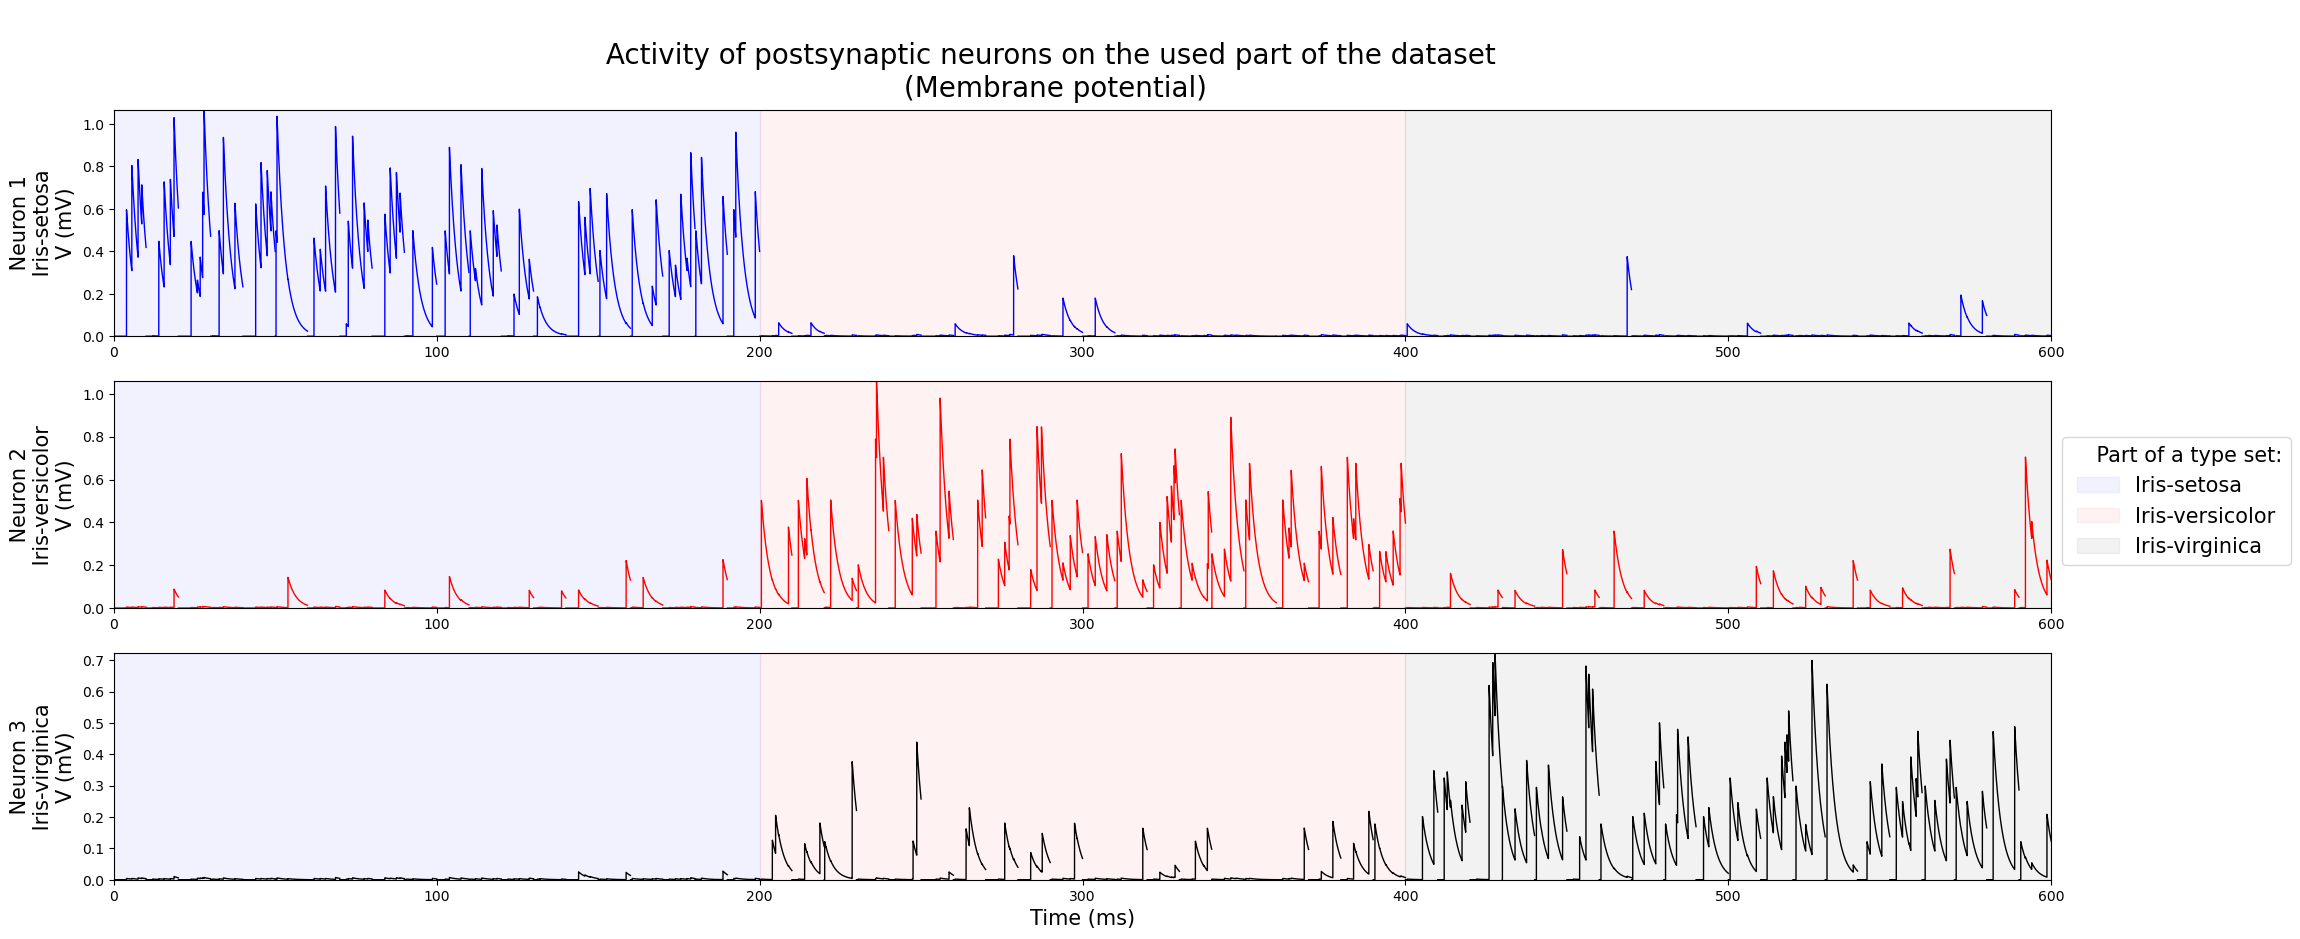

In [23]:
train_stack = model_data(0, ind_type, lat_ne, 0, 20)
res = LIF_SNN(3, 60, train_stack, list_weight, 100)
v = res[0]

v_plot(v)

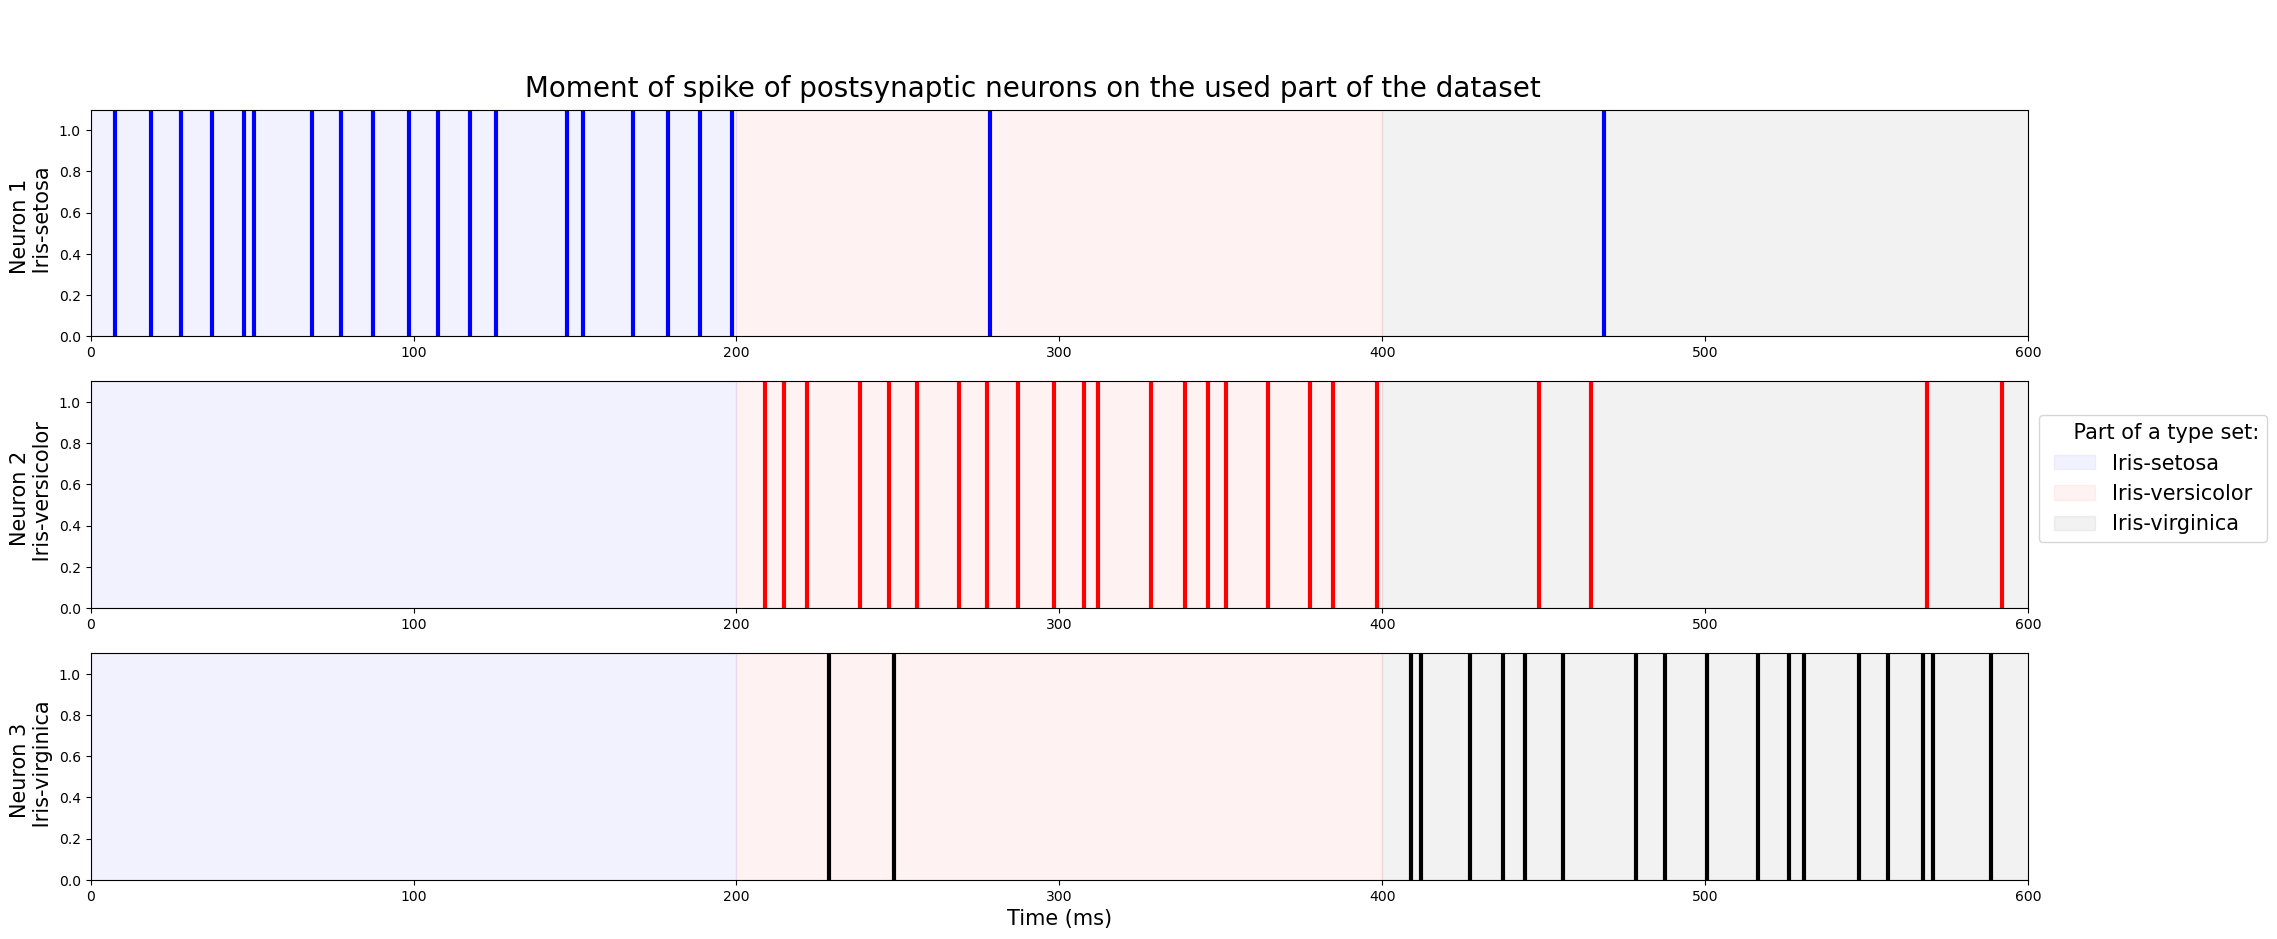

accur.: 93.33 %


In [24]:
res = LIF_SNN(3, 60, train_stack, list_weight, 0.25)
spike_time = res[2]
spike_plot(spike_time, False, False, False)
accuracy_snn(spike_time, 0, 20, df, ind_type, 0)[2]

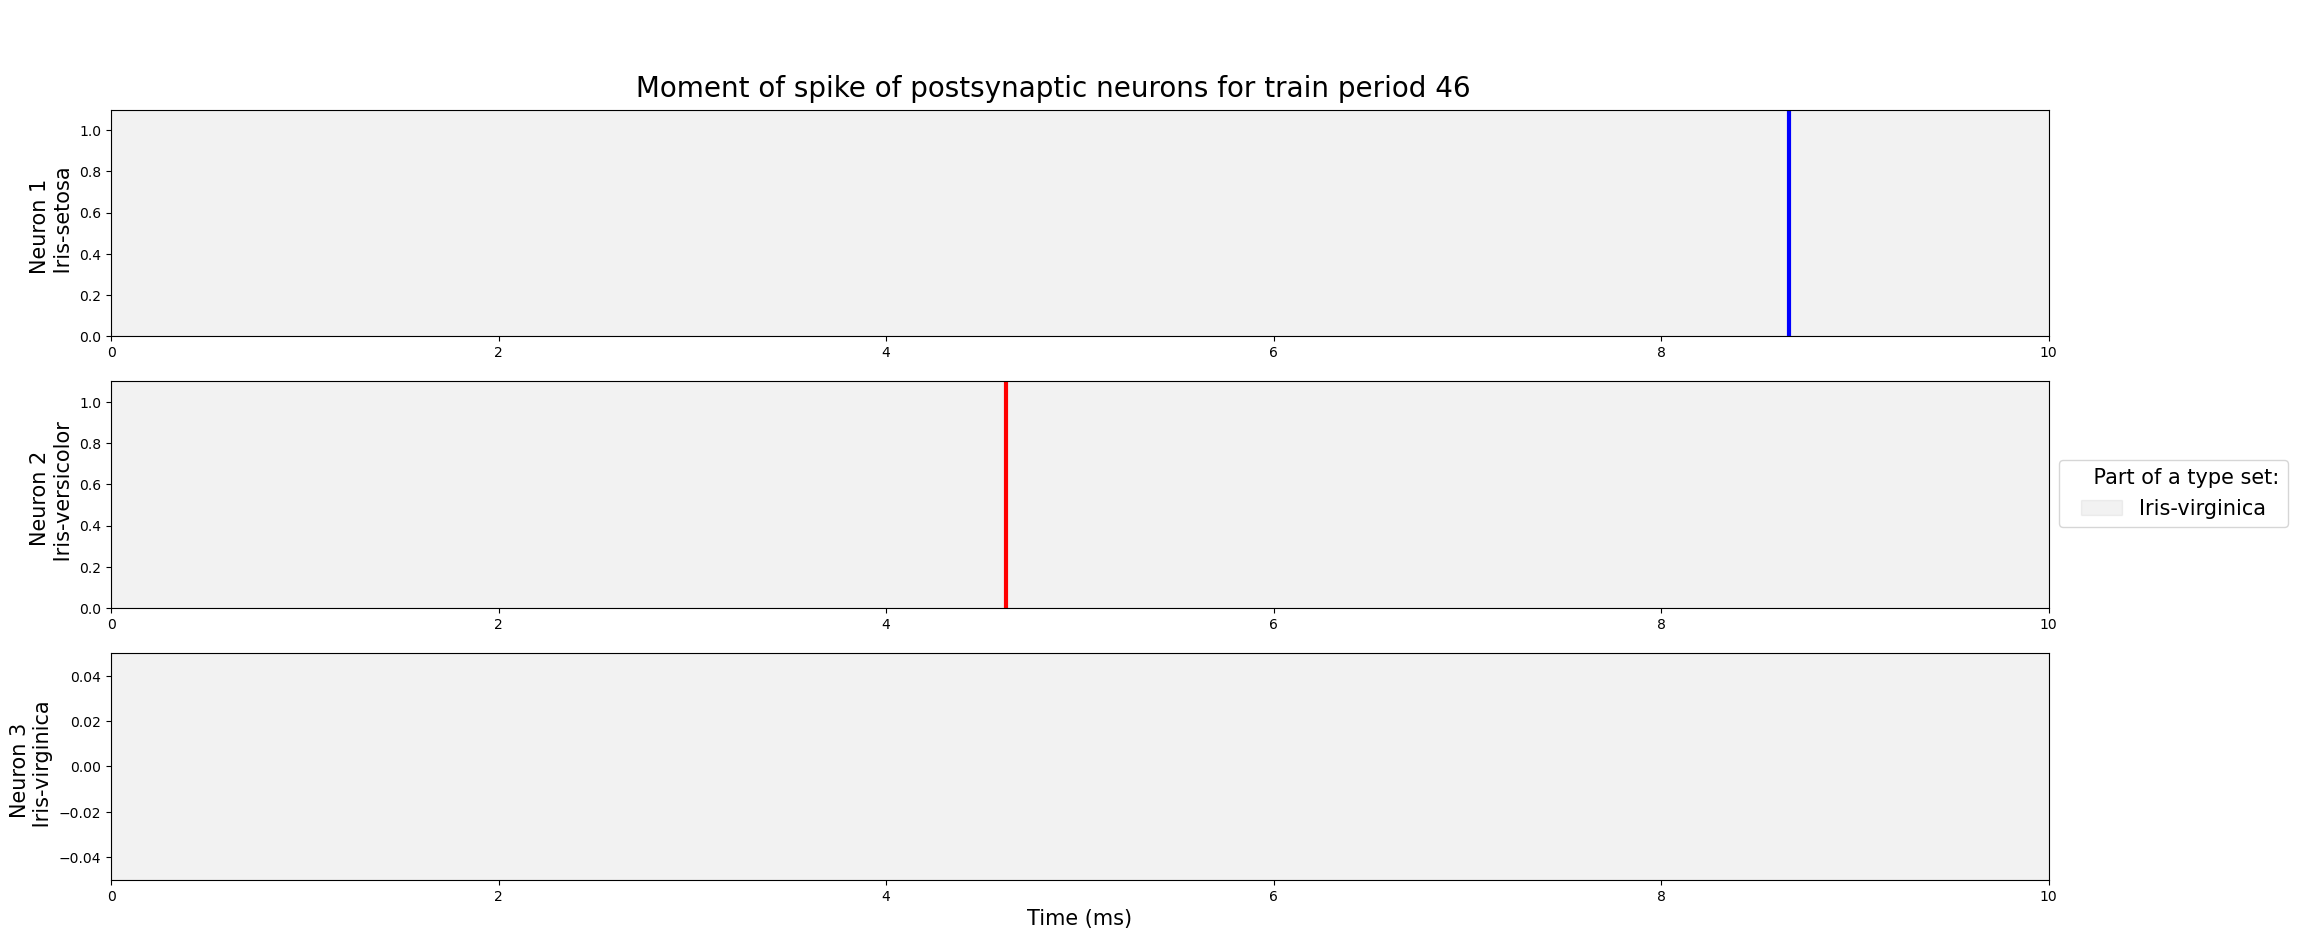

In [26]:
spike_plot(spike_time, True, 46, 3)

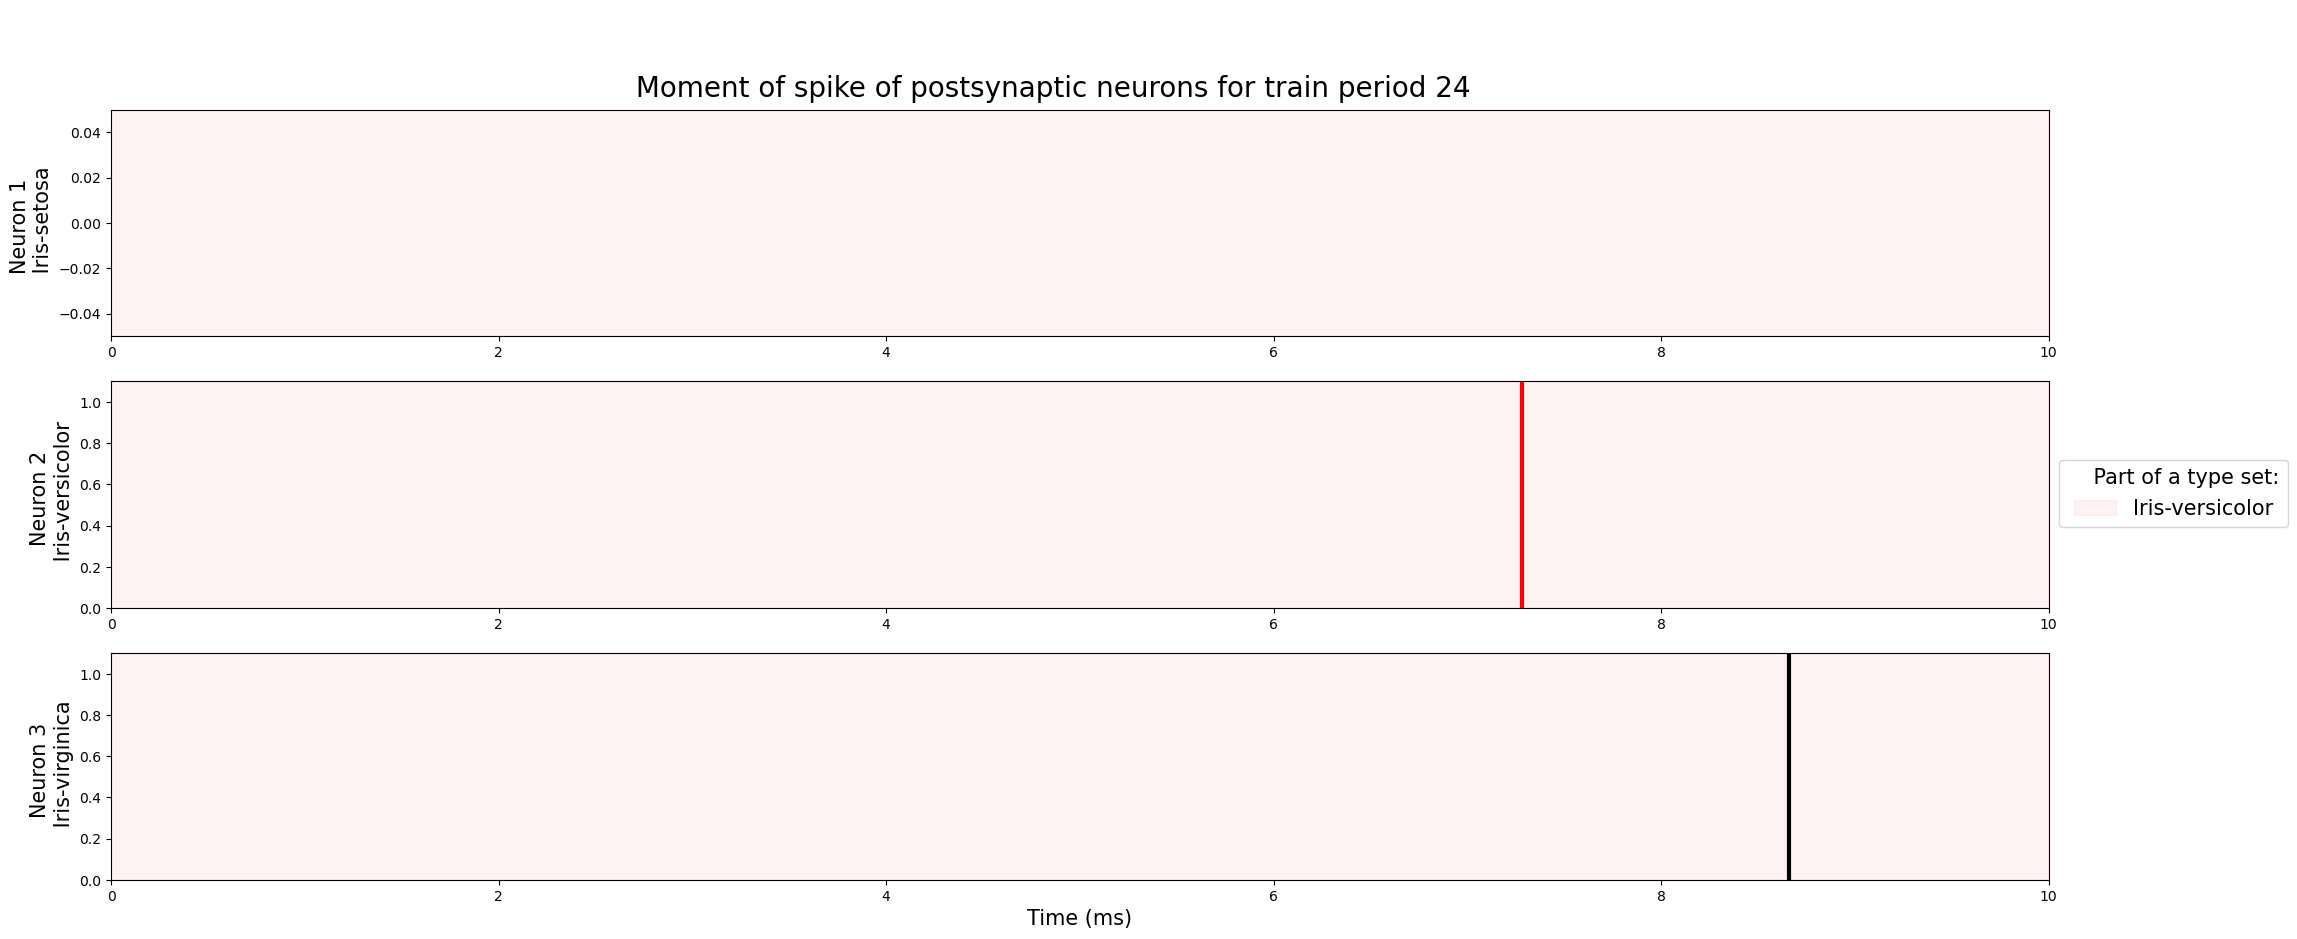

In [27]:
spike_plot(spike_time, True, 24, 2)


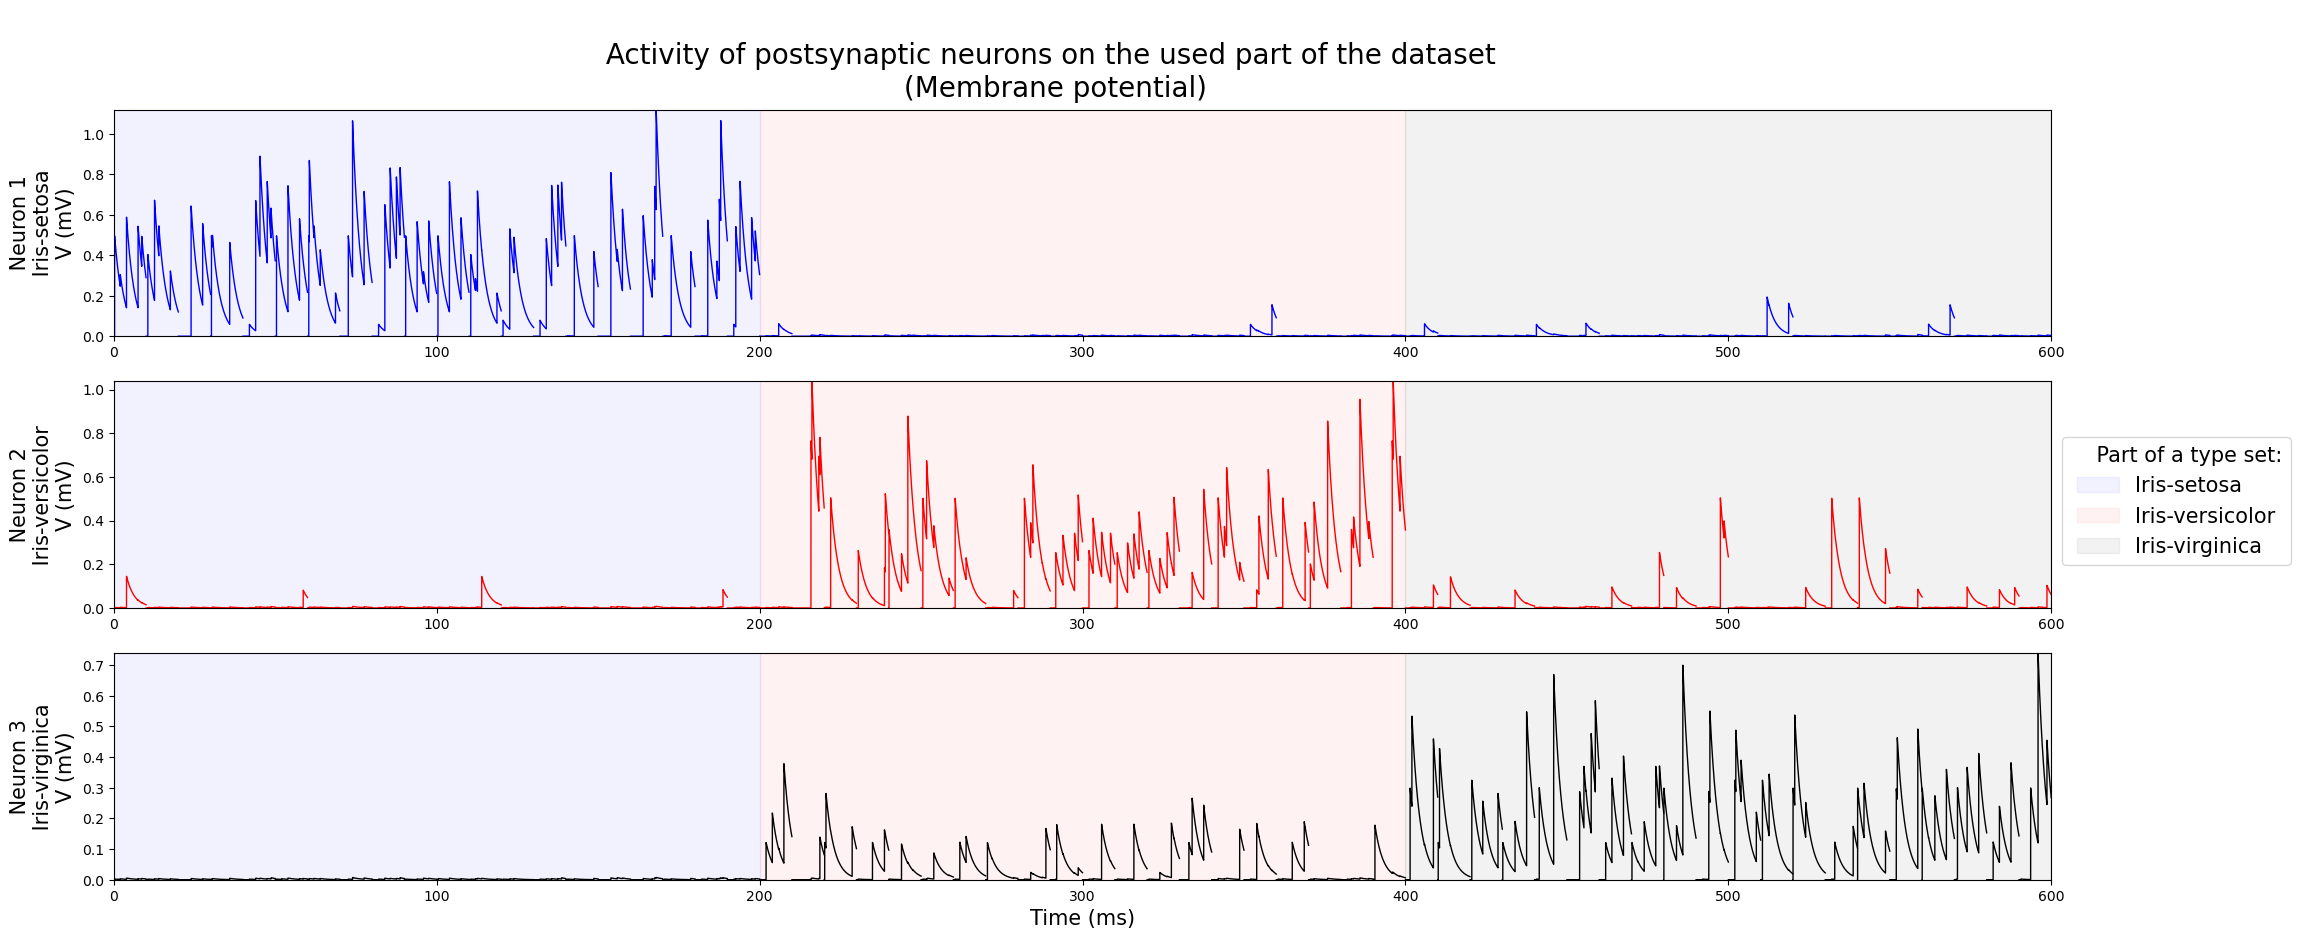

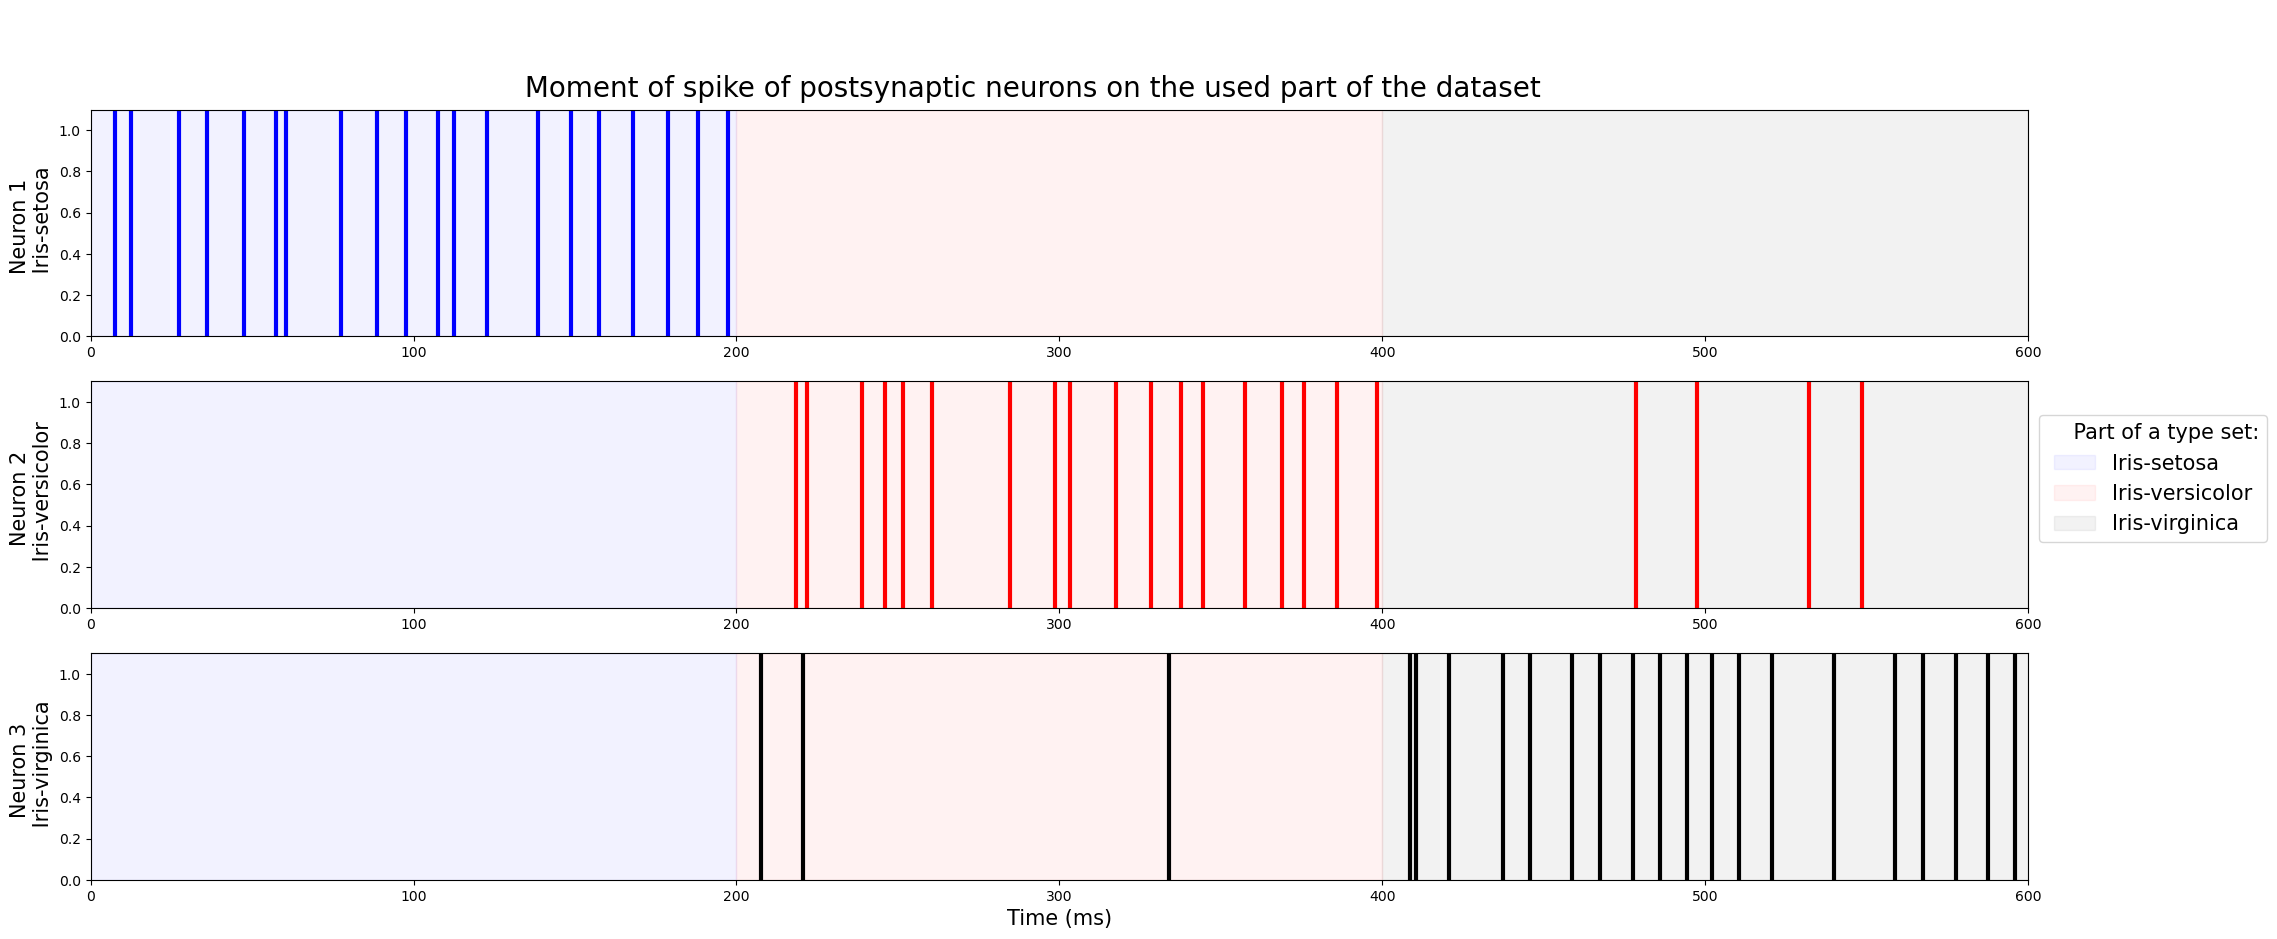

accur.: 91.67 %


In [28]:
train_stack = model_data(0, ind_type, lat_ne, 20, 40)
res = LIF_SNN(3, 60, train_stack, list_weight, 100)
v = res[0]

v_plot(v)
res = LIF_SNN(3, 60, train_stack, list_weight, 0.25)
spike_time = res[2]
spike_plot(spike_time, False, False, False)
accuracy_snn(spike_time, 20, 40, df, ind_type, 0)[2]

In [29]:
res = LIF_SNN(3, 60, train_stack, list_weight, 0.25)
t_post = res[1]
A_p = 0.8
A_m = A_p * 1.1

for n in range(3):
    for u in range(20):
        
        t1 = np.round(train_stack[u + 10 * n] * 1000)
        t2 = t1.copy()
        
        t2[((t1 <= t_post[n, u]) & (t1 > 0))] = A_p * np.exp((t1[((t1 <= t_post[n, u]) & (t1 > 0))] - t_post[n, u]) / 1000)
        t2[((t1 > t_post[n, u]) & (t1 > 0))] = - A_m * np.exp((t_post[n, u] - t1[((t1 > t_post[n, u]) & (t1 > 0))]) / 1000)
        
        list_weight[n, :] += t2
        
list_weight[list_weight < 0] = 0
list_weight

array([[6.862836, 13.145559, 11.218560, 0.000000, 0.100000, 0.100000,
        0.100000, 0.100000, 0.100000, 0.100000, 0.100000, 0.100000,
        0.100000, 0.000000, 3.468747, 8.101061, 5.357873, 9.094203,
        4.997382, 5.913790, 12.862322, 35.286996, 0.000000, 0.100000,
        0.100000, 0.100000, 0.100000, 0.100000, 0.100000, 0.100000,
        29.423158, 33.231633, 0.899200, 0.100000, 0.100000, 0.100000,
        0.100000, 0.100000, 0.100000, 0.100000],
       [0.846661, 0.000000, 0.000000, 6.742296, 2.221632, 3.825692,
        6.031482, 0.100000, 0.100000, 0.100000, 8.024717, 10.069888,
        0.891464, 2.484407, 0.000000, 0.000000, 0.000000, 0.100000,
        1.190985, 0.877911, 0.000000, 0.000000, 0.100000, 6.758999,
        12.250049, 19.518105, 2.642383, 0.100000, 0.100000, 0.100000,
        0.000000, 0.000000, 0.100000, 11.898439, 14.185231, 26.730888,
        0.000000, 0.000000, 0.100000, 0.100000],
       [0.100000, 0.100000, 0.100000, 0.000000, 0.000000, 5.184429,
      

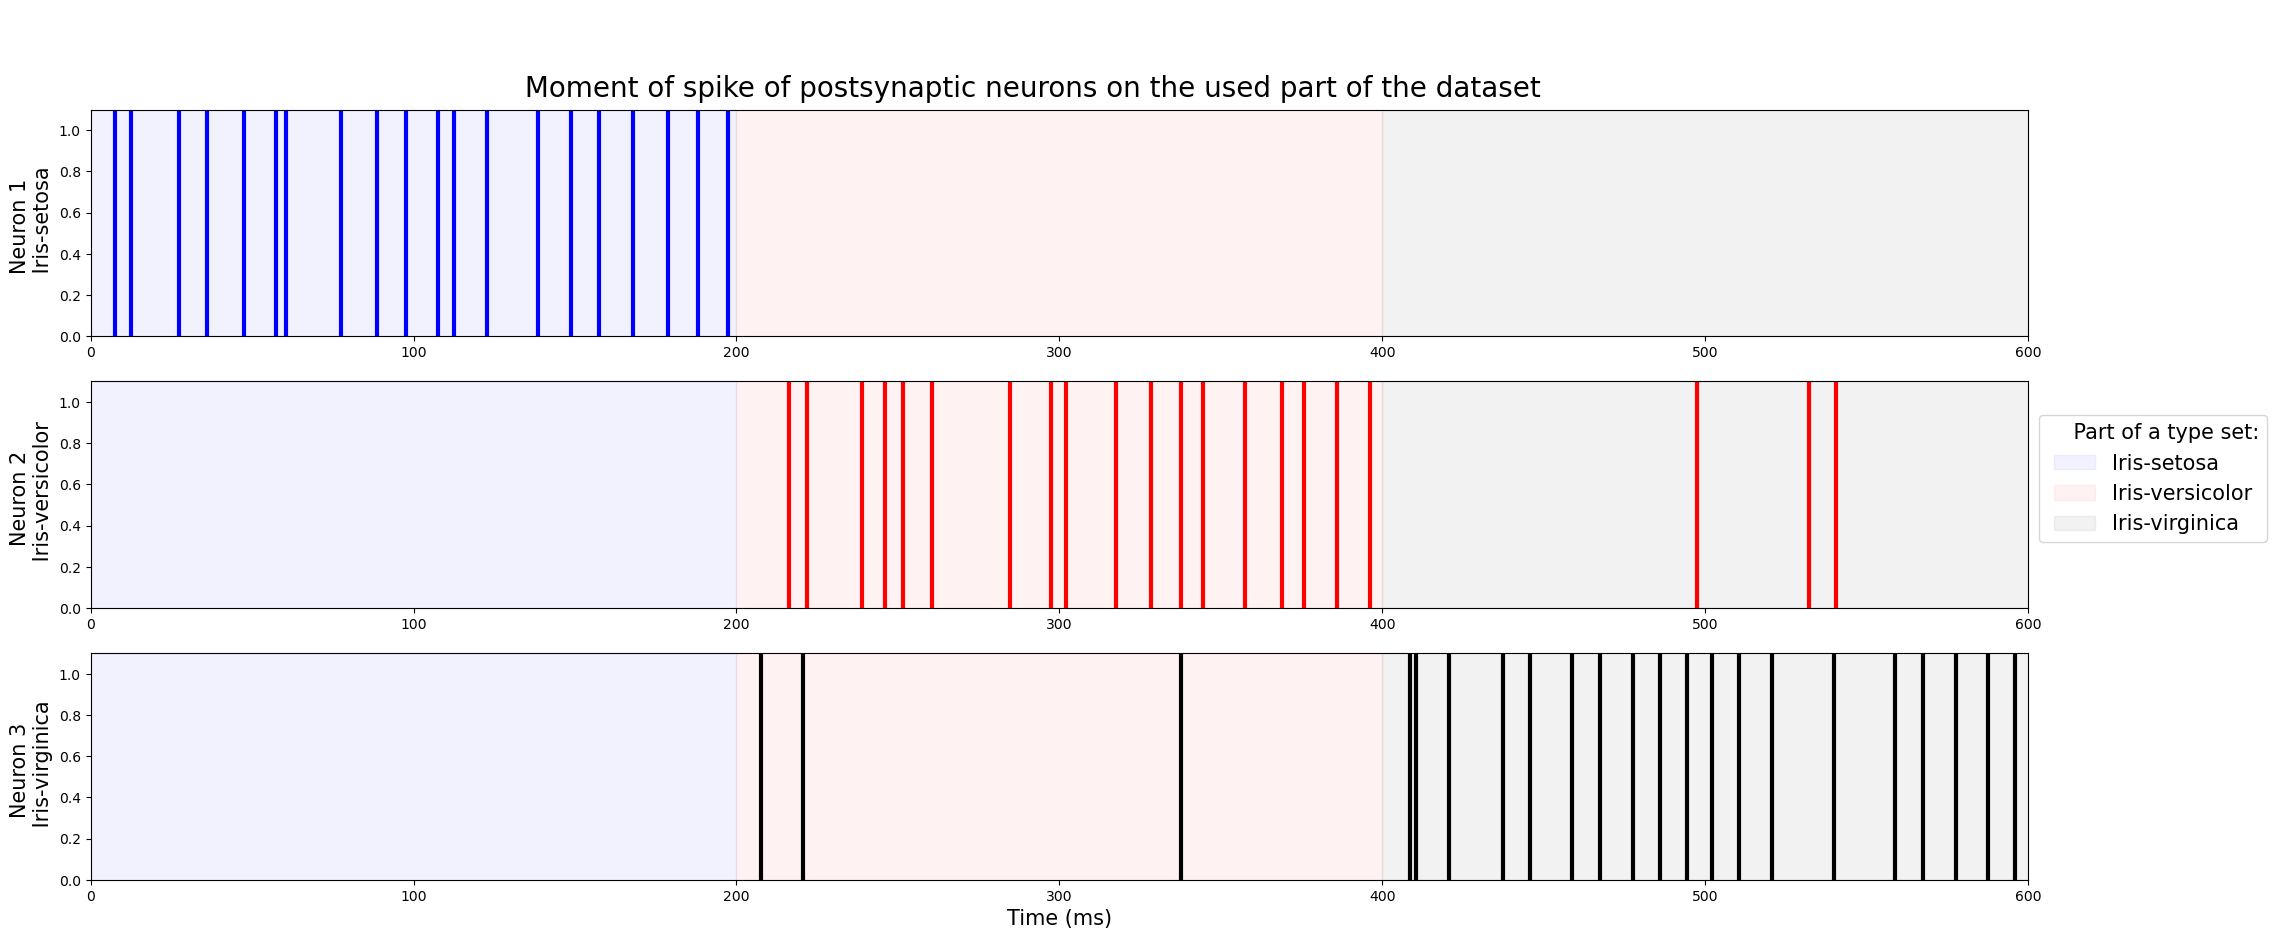

accur.: 93.33 %


In [30]:
res = LIF_SNN(3, 60, train_stack, list_weight, 0.25)
spike_time = res[2]
spike_plot(spike_time, False, False, False)
accuracy_snn(spike_time, 20, 40, df, ind_type, 0)[2]

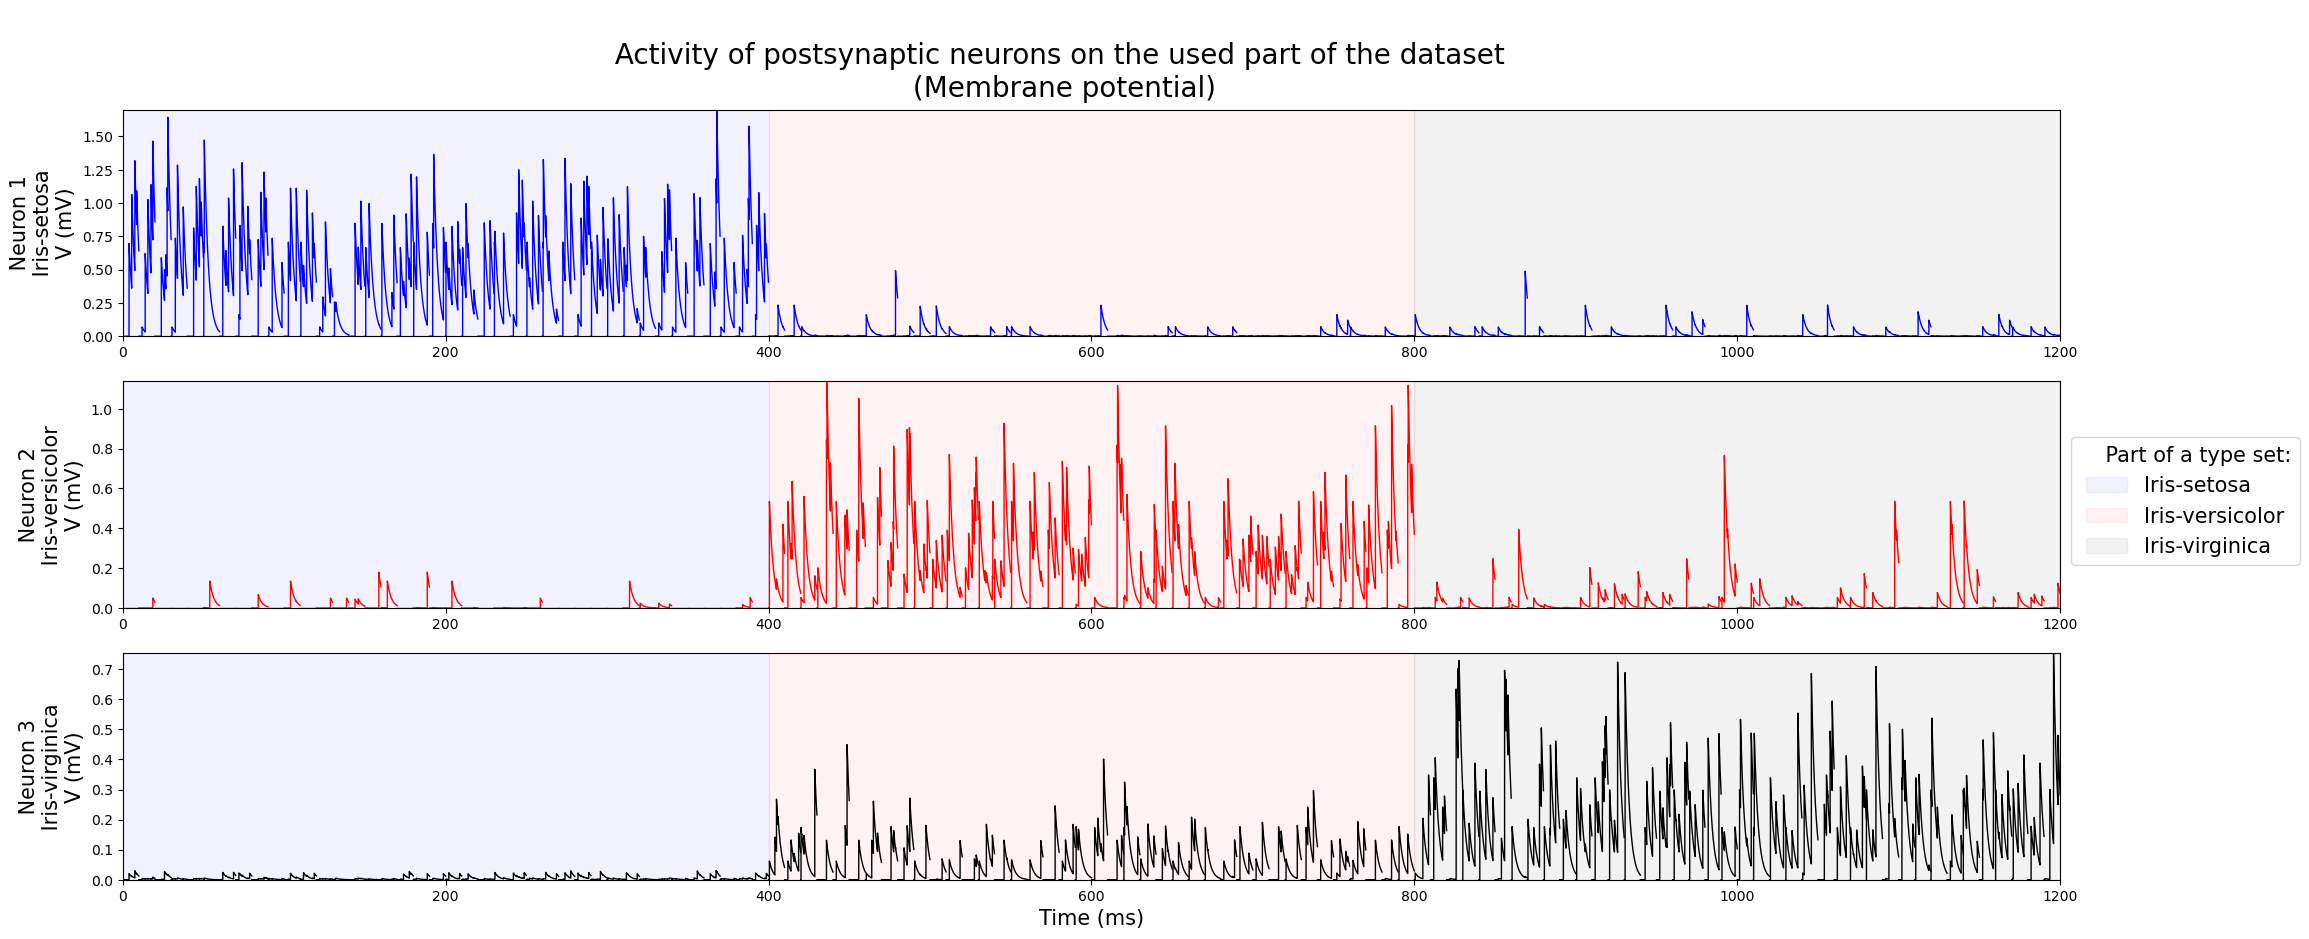

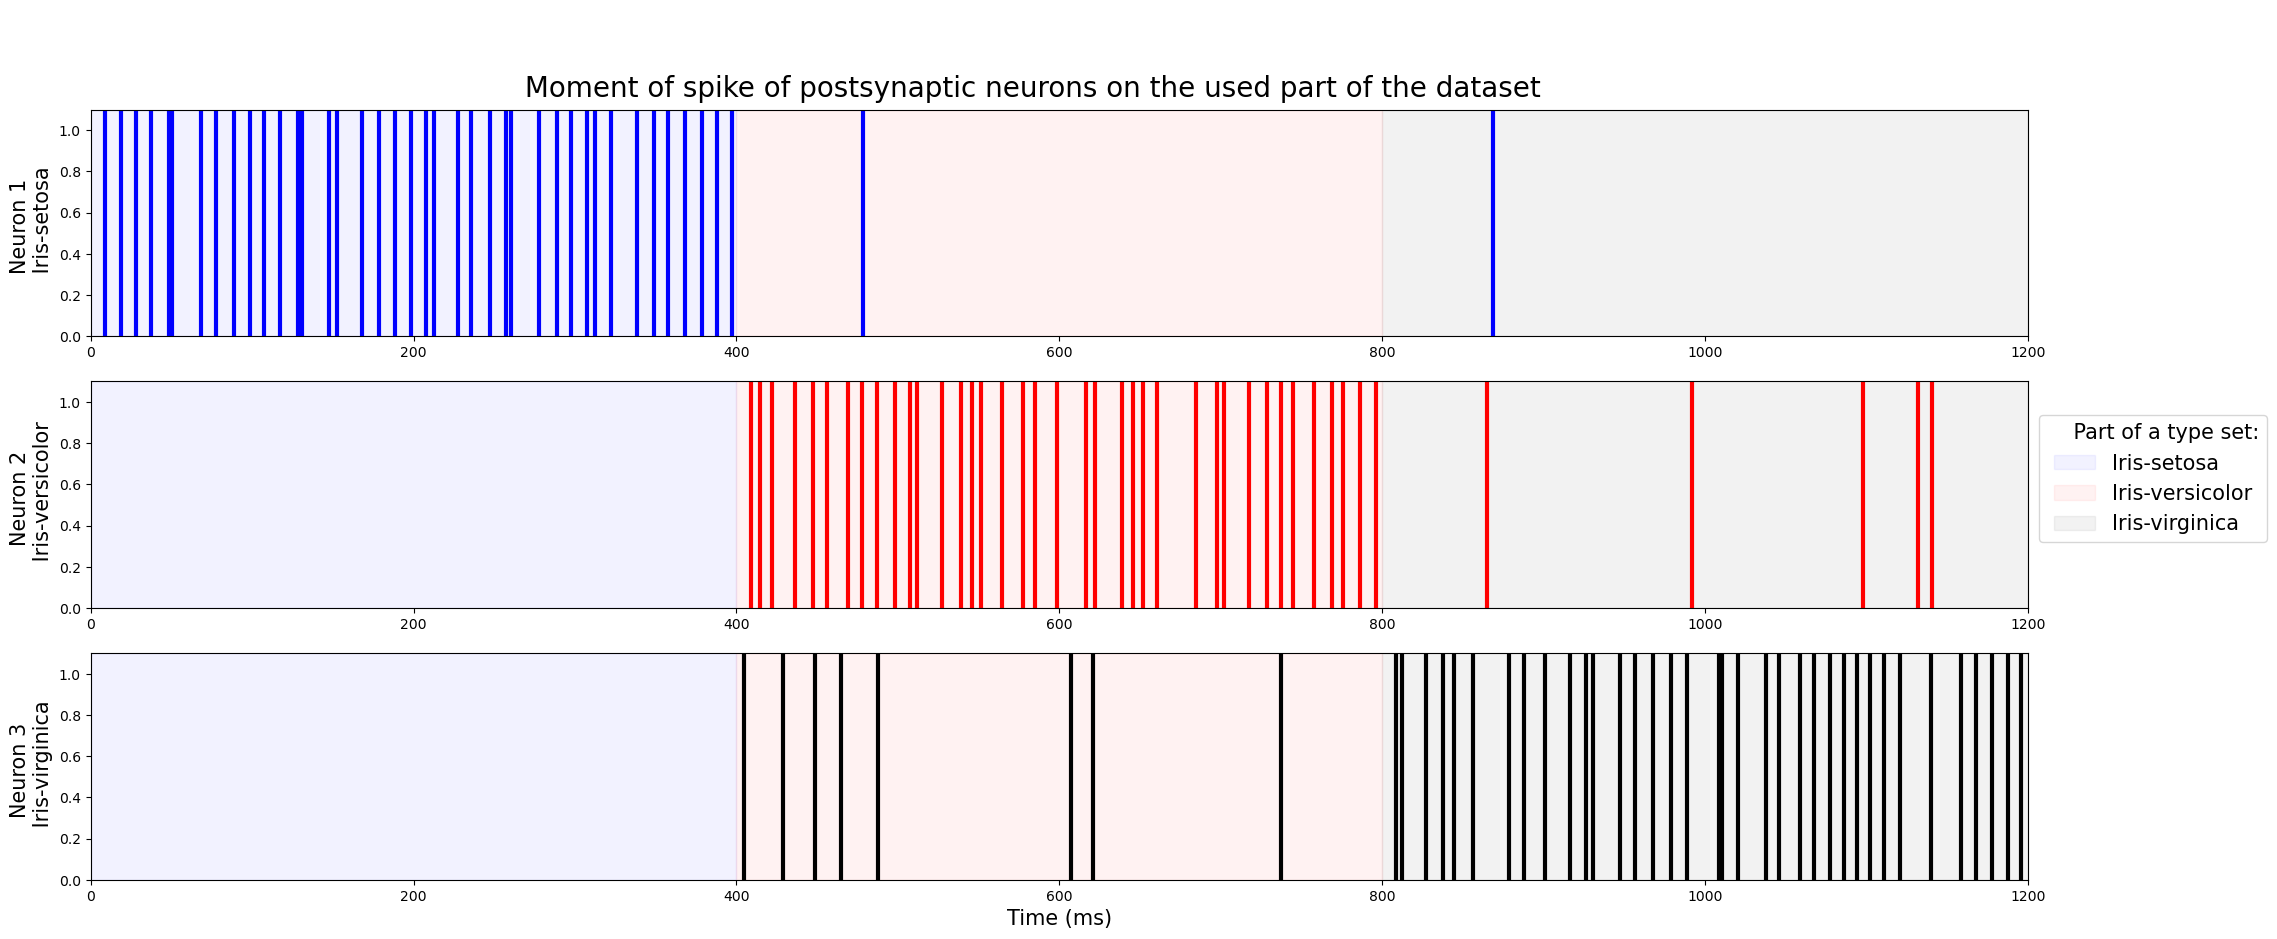

accur.: 92.5 %


In [31]:
train_stack = model_data(0, ind_type, lat_ne, 0, 40)
res = LIF_SNN(3, 120, train_stack, list_weight, 100)
v = res[0]

v_plot(v)
res = LIF_SNN(3, 120, train_stack, list_weight, 0.25)
spike_time = res[2]
spike_plot(spike_time, False, False, False)
accuracy_snn(spike_time, 0, 40, df, ind_type, 0)[2]

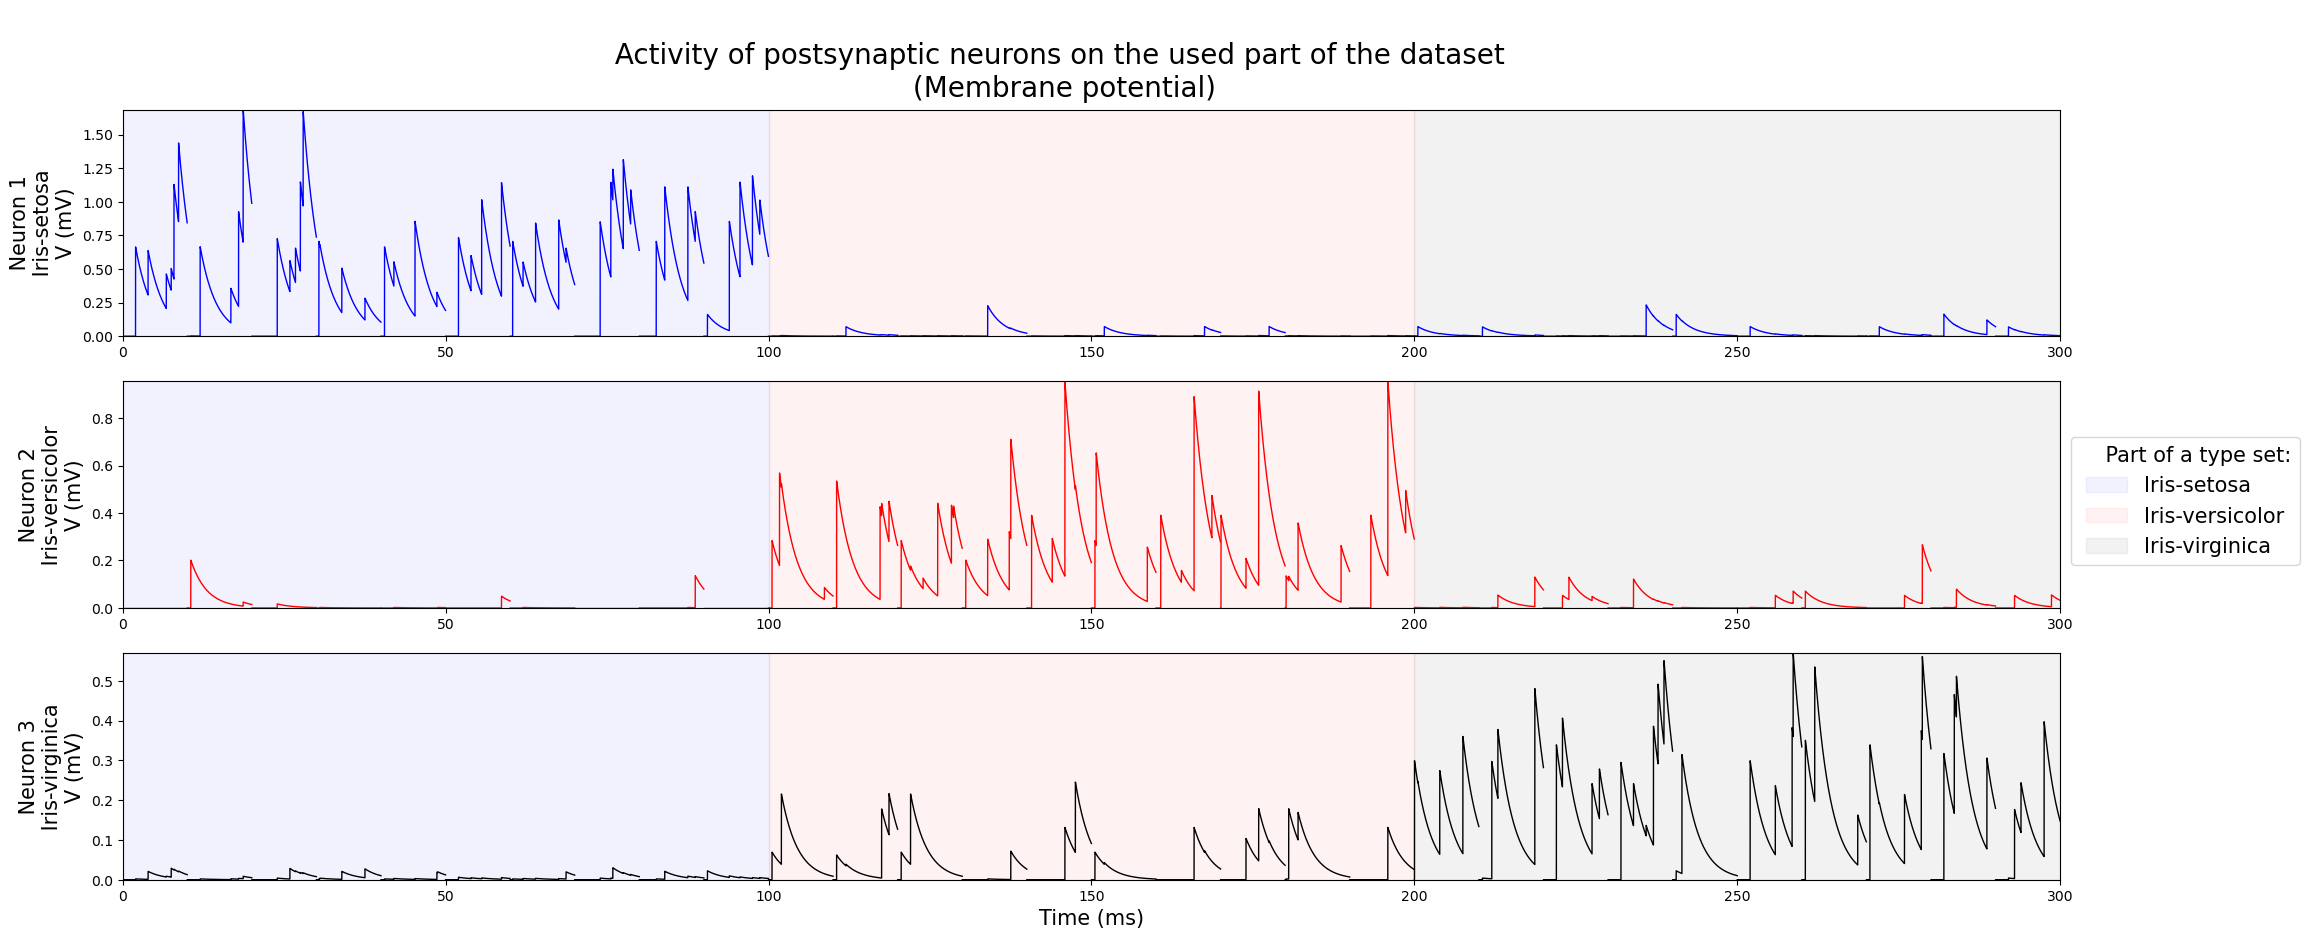

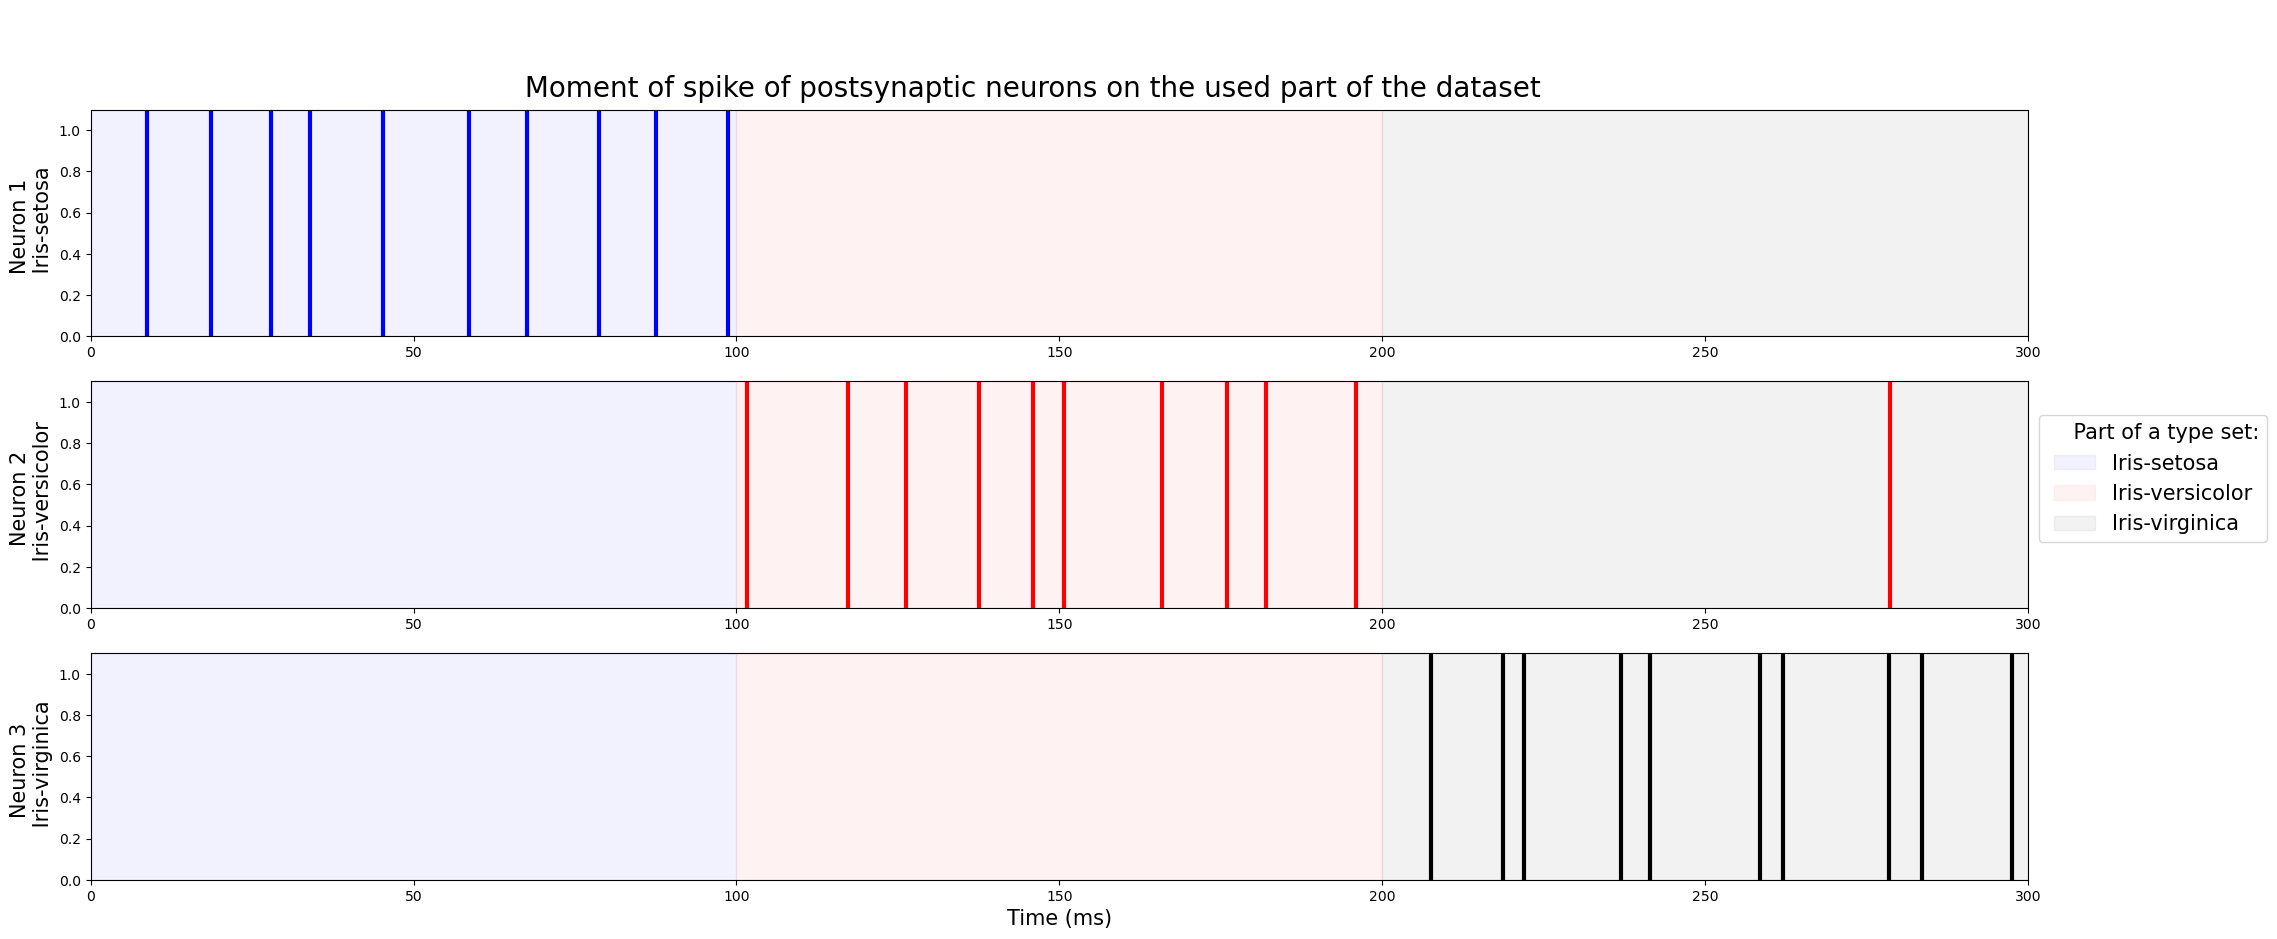

accur.: 100.0 %


In [32]:
train_stack = model_data(0, ind_type, lat_ne, 40, 50)
res = LIF_SNN(3, 30, train_stack, list_weight, 100)
v = res[0]
res = LIF_SNN(3, 30, train_stack, list_weight, 0.25)
spike_time = res[2]

v_plot(v)
spike_plot(spike_time, False, False, False)
accuracy_snn(spike_time, 40, 50, df, ind_type, 0)[2]

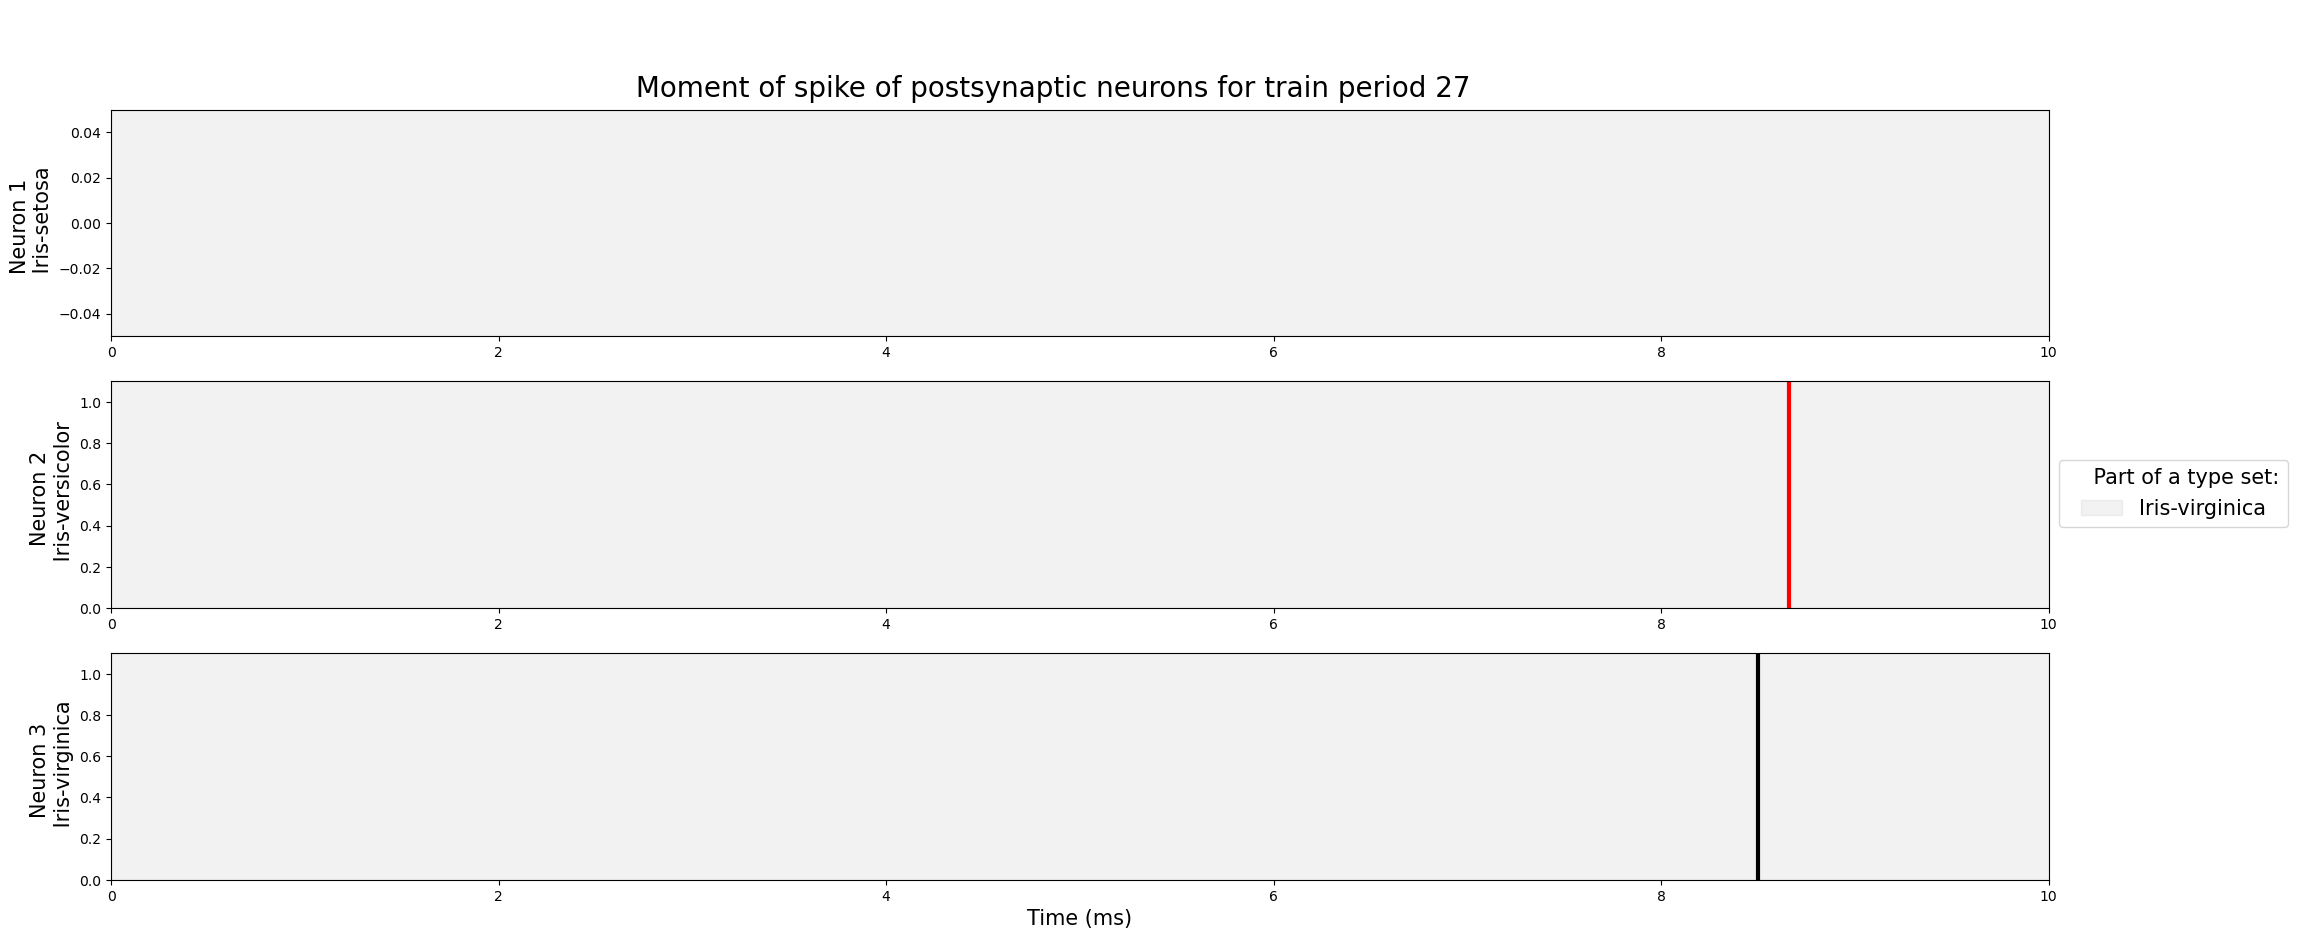

In [33]:
spike_plot(spike_time, True, 27, 3)